# Predicting Heart Disease Using Supervised Learning 

**Problem Statement:** <br/>

Deaths caused by heart disease are preventable. The possibility of this happening is predicated upon the existence of several attributes. Up until now, an efficient and reliable method for detecting heart disease in a timely manner was not available. <br/>

**The objective of this project is twofold:<br/>**

Firstly, to explore the possibility of using supervised learning techniques to detect heart disease. <br/>
Secondly, to compare and contrast classification methods for heart disease detection. <br/>

**Data Source and Descrption** <br/>

**Data Source:**<br/>

Cleveland Heart Disease Database via the UCI Machine Learning repository.  <br/>

**Attributes:**<br/>

1. Age  <br/>
2. Sex    <br/>
3. Chest pain type (4 values)   <br/>
4. Resting blood pressure: diastolic blood pressure (which is typically over 80 mm Hg)    <br/>
5. Serum cholestoral in mg/dl  (the amount of cholesterol in the blood)   <br/>
6. Fasting blood sugar > 120 mg/dl (indicates how the body is managing blood sugar)  <br/>
7. Resting electrocardiographic results (values 0,1,2)   <br/>
8. Maximum heart rate achieved    <br/>
9. Exercise induced angina     <br/>
10. Oldpeak = ST depression induced by exercise relative to rest    <br/>
11. The slope of the peak exercise ST segment    <br/>
12. Number of major vessels (0-3) colored by flourosopy     <br/>
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect     <br/>


In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statistics import mode
import statistics
from sklearn import model_selection 
%matplotlib inline

In [236]:
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth', -1)

In [237]:
pd.set_option('display.colheader_justify','left')

In [238]:
Attribute_Table = pd.DataFrame(np.array([['Age','Age in years','Continuous'],['Sex','Female (0), Male (1)','Categorical'],['Chest Pain Type','(1): typical angina,(2): atypical angina, (3): non-anginal pain, (4): asymptomatic','Categorical'], ['Resting Blood Pressure','Measured in mm Hg, upon admission to hospital. Typically above 80 mm Hg','Continuous'],['Serum Cholesterol','Measured in mg/dl. It is the amount of cholesterol particles in the blood','Continuous'],['Fasting Blood Pressure','Measured in mg/dl. It indicates how well the body is managing blood sugar (>120).','Continuous'],['Resting electrocardiographic results','(0) normal,(1) having ST-T wave abnormality, (2) showing probable or definite left ventricular hypertrophy by Estes criteria','Categorical'],['Maximum heart rate achieved','Measured in beats per minute','Continuous'],['Exercise-induced angina','(0) not present, (1) present','Categorical'],['Oldpeak = ST depression induced by exercise relative to rest','On an ECG Plot: ST Segment abnormality indicates heart disease.','Continuous'],['Slope of peak exercise st segment','(1): upsloping,(2): flat,(3): downsloping','Categorical'],['Number of major vessels colored by flourosopy','0-3','Categorical'],['Thal','Refers to a blood disorder called thalassemia ((3) normal;(6) = fixed defect;(7) = reversable defect)','Categorical']]),
                    columns=['Attribute', 'Description', 'Type'])

Attribute_Table = Attribute_Table.style.set_properties(**{'text-align':'left'})

Attribute_Table

,Attribute,Description,Type
0,Age,Age in years,Continuous
1,Sex,"Female (0), Male (1)",Categorical
2,Chest Pain Type,"(1): typical angina,(2): atypical angina, (3): non-anginal pain, (4): asymptomatic",Categorical
3,Resting Blood Pressure,"Measured in mm Hg, upon admission to hospital. Typically above 80 mm Hg",Continuous
4,Serum Cholesterol,Measured in mg/dl. It is the amount of cholesterol particles in the blood,Continuous
5,Fasting Blood Pressure,Measured in mg/dl. It indicates how well the body is managing blood sugar (>120).,Continuous
6,Resting electrocardiographic results,"(0) normal,(1) having ST-T wave abnormality, (2) showing probable or definite left ventricular hypertrophy by Estes criteria",Categorical
7,Maximum heart rate achieved,Measured in beats per minute,Continuous
8,Exercise-induced angina,"(0) not present, (1) present",Categorical
9,Oldpeak = ST depression induced by exercise relative to rest,On an ECG Plot: ST Segment abnormality indicates heart disease.,Continuous


# Datasets and Libraries 

In [239]:
import warnings
warnings.filterwarnings("ignore")

In [240]:
pd.set_option('max_columns',None)
pd.set_option('max_rows', None)

In [241]:
submission_format=pd.read_csv(r'C:\Users\zalth\Desktop\heart_disease_data\submission_format.csv')

In [242]:
final_test_values=pd.read_csv(r'C:\Users\zalth\Desktop\heart_disease_data\test_values.csv')

In [243]:
train_outcome=pd.read_csv(r'C:\Users\zalth\Desktop\heart_disease_data\train_labels.csv')

In [244]:
train_features=pd.read_csv(r'C:\Users\zalth\Desktop\heart_disease_data\train_values.csv')

In [245]:
train_features.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [246]:
train_outcome.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [247]:
final_test_values.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


This competition uses log loss as its evaluation metric, so the heart_disease_present values you should submit are the probabilities that a patient has heart disease (not the binary label).

In [248]:
train_features

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
5,ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0
6,2gbyh9,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0
7,daa9kp,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1
8,3nwy2n,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1
9,1r508r,2,normal,120,3,0,0,0,219,1.6,0,50,158,0


In [249]:
train = pd.merge(train_features,train_outcome, on='patient_id')
train.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


# Data Exploration

In [250]:
train.describe(include='all')

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180,180.000000,180,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
unique,180,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,02cipp,NaN,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.550000,NaN,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,NaN,0.618838,NaN,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,NaN,1.000000,NaN,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,NaN,1.000000,NaN,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,NaN,1.000000,NaN,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,NaN,2.000000,NaN,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000


In [251]:
train_1 = train.copy()
train_1.info()
len(train_1.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
heart_disease_present                   180 non-null int64
dtypes

15

In [252]:
train_1.nunique()

patient_id                              180
slope_of_peak_exercise_st_segment       3  
thal                                    3  
resting_blood_pressure                  36 
chest_pain_type                         4  
num_major_vessels                       4  
fasting_blood_sugar_gt_120_mg_per_dl    2  
resting_ekg_results                     3  
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                34 
sex                                     2  
age                                     40 
max_heart_rate_achieved                 73 
exercise_induced_angina                 2  
heart_disease_present                   2  
dtype: int64

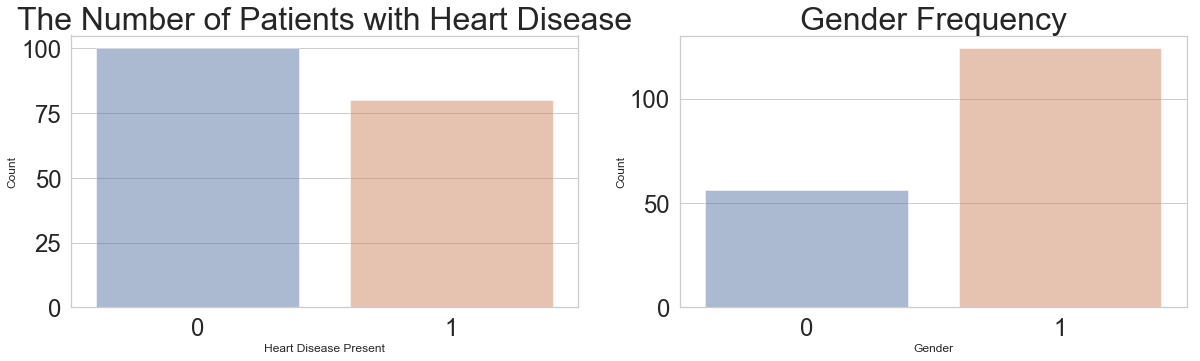

Heart Disease Value Counts:
 0    100
1    80 
Name: heart_disease_present, dtype: int64
Gender Value Counts:
 1    124
0    56 
Name: sex, dtype: int64


In [253]:
fig = plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
ax = sns.countplot(x="heart_disease_present", data=train_1, alpha=0.5)
plt.title('The Number of Patients with Heart Disease')
plt.xlabel('Heart Disease Present')
plt.ylabel('Count')

plt.subplot(1,2,2)
ax=sns.countplot(x='sex',data=train_1, alpha=0.5)
plt.title('Gender Frequency')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

fig.tight_layout()

print('Heart Disease Value Counts:\n',train_1.heart_disease_present.value_counts())

print('Gender Value Counts:\n',train_1.sex.value_counts())

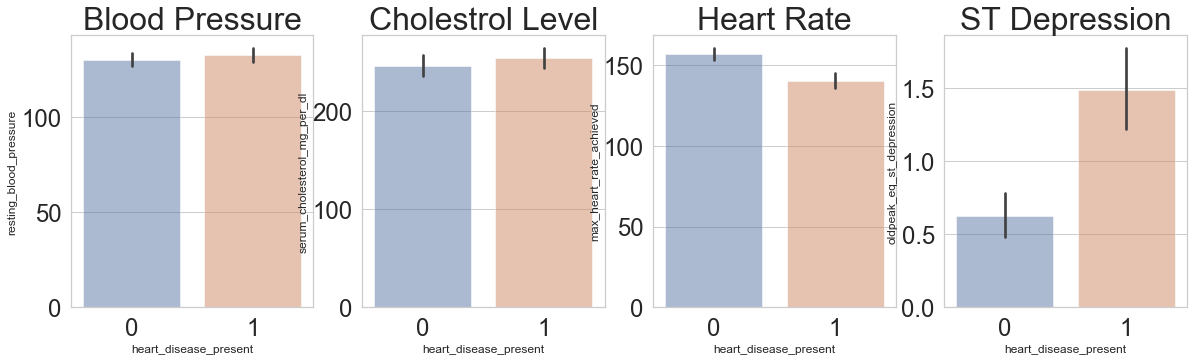

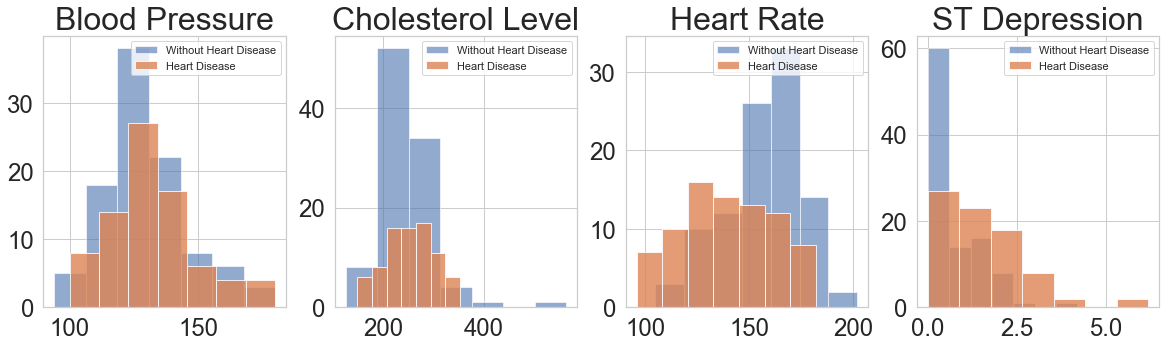

In [254]:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
sns.barplot(train_1["heart_disease_present"],train_1["resting_blood_pressure"], alpha=0.5)
plt.title("Blood Pressure")

plt.subplot(1,4,2)
sns.barplot(train_1["heart_disease_present"], train_1["serum_cholesterol_mg_per_dl"], alpha=0.5)
plt.title("Cholestrol Level")

plt.subplot(1,4,3)
sns.barplot(train_1["heart_disease_present"],train_1['max_heart_rate_achieved'], alpha=0.5)
plt.title("Heart Rate")

plt.subplot(1,4,4)
sns.barplot(train_1["heart_disease_present"],train_1['oldpeak_eq_st_depression'], alpha=0.5)
plt.title("ST Depression")


plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
x= train_1[train_1.heart_disease_present ==0].resting_blood_pressure
y= train_1[train_1.heart_disease_present ==1].resting_blood_pressure
plt.hist(x, label='Without Heart Disease', alpha=0.6, bins=7)
plt.hist(y, label='Heart Disease', alpha=0.8, bins=7)
plt.title('Blood Pressure')
plt.legend()

plt.subplot(1,4,2)
x= train_1[train_1.heart_disease_present ==0].serum_cholesterol_mg_per_dl
y= train_1[train_1.heart_disease_present ==1].serum_cholesterol_mg_per_dl
plt.hist(x, label='Without Heart Disease', alpha=0.6, bins=7)
plt.hist(y, label='Heart Disease', alpha=0.8, bins=7)
plt.title('Cholesterol Level')
plt.legend()

plt.subplot(1,4,3)
x= train_1[train_1.heart_disease_present ==0].max_heart_rate_achieved
y= train_1[train_1.heart_disease_present ==1].max_heart_rate_achieved
plt.hist(x, label='Without Heart Disease', alpha=0.6, bins=7)
plt.hist(y, label='Heart Disease', alpha=0.8, bins=7)
plt.title('Heart Rate')
plt.legend()

plt.subplot(1,4,4)
x= train_1[train_1.heart_disease_present == 0].oldpeak_eq_st_depression
y= train_1[train_1.heart_disease_present == 1].oldpeak_eq_st_depression
plt.hist(x, label='Without Heart Disease', alpha=0.6, bins=7)
plt.hist(y, label='Heart Disease', alpha=0.8, bins=7)
plt.title('ST Depression')
plt.legend()

plt.show()


In [255]:
mean = train_1.groupby('heart_disease_present')['serum_cholesterol_mg_per_dl'].mean()
max_1 = train_1.groupby('heart_disease_present')['serum_cholesterol_mg_per_dl'].max()
min_1 = train_1.groupby('heart_disease_present')['serum_cholesterol_mg_per_dl'].min()
 
print (mean,max_1,min_1)

heart_disease_present
0    245.46
1    253.90
Name: serum_cholesterol_mg_per_dl, dtype: float64 heart_disease_present
0    564
1    353
Name: serum_cholesterol_mg_per_dl, dtype: int64 heart_disease_present
0    126
1    149
Name: serum_cholesterol_mg_per_dl, dtype: int64


**For blood pressure, the data is very close to normal distribution. Cholesterol level is skewed to the left, potentially due to outliers. While Heart Rate is skewed to the right.**

In [256]:
# Test whether group differences are significant.
heart_disease_present = train_1["heart_disease_present"].unique()
grouped_df = train_1.groupby("heart_disease_present")
for var in ["resting_blood_pressure", "serum_cholesterol_mg_per_dl", "max_heart_rate_achieved","oldpeak_eq_st_depression"]:
    print("*************************************************************************************************************")
    print("Comparisons for variable: {}".format(var))
    print("*************************************************************************************************************")
    for i in range(0, len(heart_disease_present)):
        for j in range(i+1, len(heart_disease_present)):
            print("t-test between groups {0} and {1}:".format(heart_disease_present[i], heart_disease_present[j]))
            print(stats.ttest_ind(
                train_1[train_1["heart_disease_present"]==heart_disease_present[i]][var], 
                train_1[train_1["heart_disease_present"]==heart_disease_present[j]][var]
            ))

*************************************************************************************************************
Comparisons for variable: resting_blood_pressure
*************************************************************************************************************
t-test between groups 0 and 1:
Ttest_indResult(statistic=-1.050639778820372, pvalue=0.2948483625770824)
*************************************************************************************************************
Comparisons for variable: serum_cholesterol_mg_per_dl
*************************************************************************************************************
t-test between groups 0 and 1:
Ttest_indResult(statistic=-1.067732228096249, pvalue=0.28708726349665403)
*************************************************************************************************************
Comparisons for variable: max_heart_rate_achieved
****************************************************************************************

**As expected, there is siginifcant difference between people with Heart Disease in terms of Heart Rate.This is also the case for ST Depression levels. Otherwise, Blood Pressure and cholesterol levels do not seem to have a higher or lower propensity for heart disease.**

In [257]:
train_2=train_1.copy()

In [258]:
bins = [0,29,39,49,59,69,100]
group_names=['0-29','30-39','40-49','50-59','60-69','70+']
train_2['age_group'] = pd.cut(train_2['age'],bins,labels=group_names)
train_2.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,age_group
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0,40-49
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0,50-59
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1,70+
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1,40-49
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0,50-59


In [259]:
train_3=train_2.copy()
agg=train_3.groupby('age_group').mean()
agg.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
age_group,,,,,,,,,,,,,
0-29,1.000000,130.000000,2.000000,0.000000,0.000000,2.000000,204.000000,0.000000,1.000000,29.000000,202.000000,0.000000,0.000000
30-39,1.428571,123.142857,3.000000,0.000000,0.000000,0.571429,239.428571,1.042857,0.714286,36.714286,164.571429,0.428571,0.571429
40-49,1.363636,123.522727,3.022727,0.409091,0.045455,0.863636,235.250000,0.456818,0.772727,44.477273,160.636364,0.181818,0.318182
50-59,1.602941,132.882353,3.176471,0.588235,0.220588,1.161765,246.205882,1.172059,0.735294,54.750000,147.602941,0.367647,0.441176
60-69,1.673077,136.826923,3.288462,1.096154,0.211538,1.076923,266.442308,1.298077,0.576923,63.961538,141.750000,0.346154,0.557692


Text(0.5, 1.0, 'Heart Disease by Age and Gender')

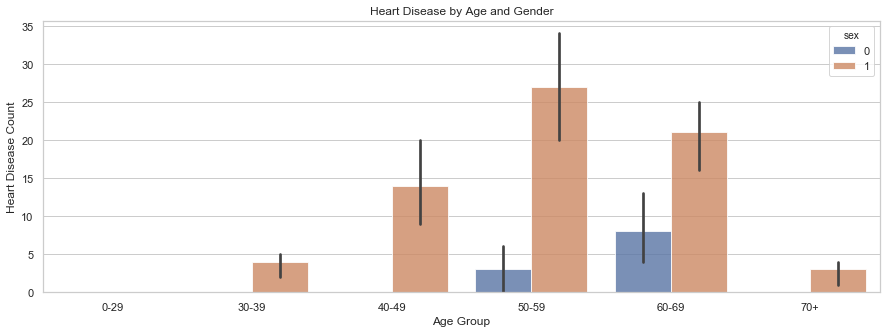

In [260]:
plt.figure(figsize=(15,5))

sns.set(style='whitegrid')
x=train_3.age_group
y="heart_disease_present"
ax = sns.barplot(x,y,hue="sex", data=train_3, estimator=sum, alpha=0.8)
plt.ylabel('Heart Disease Count')
plt.xlabel('Age Group')
plt.title('Heart Disease by Age and Gender')

**The chart points to correlation between age, gender and heart disease.However it must be mentioned that the males are over-represented in the data.** 

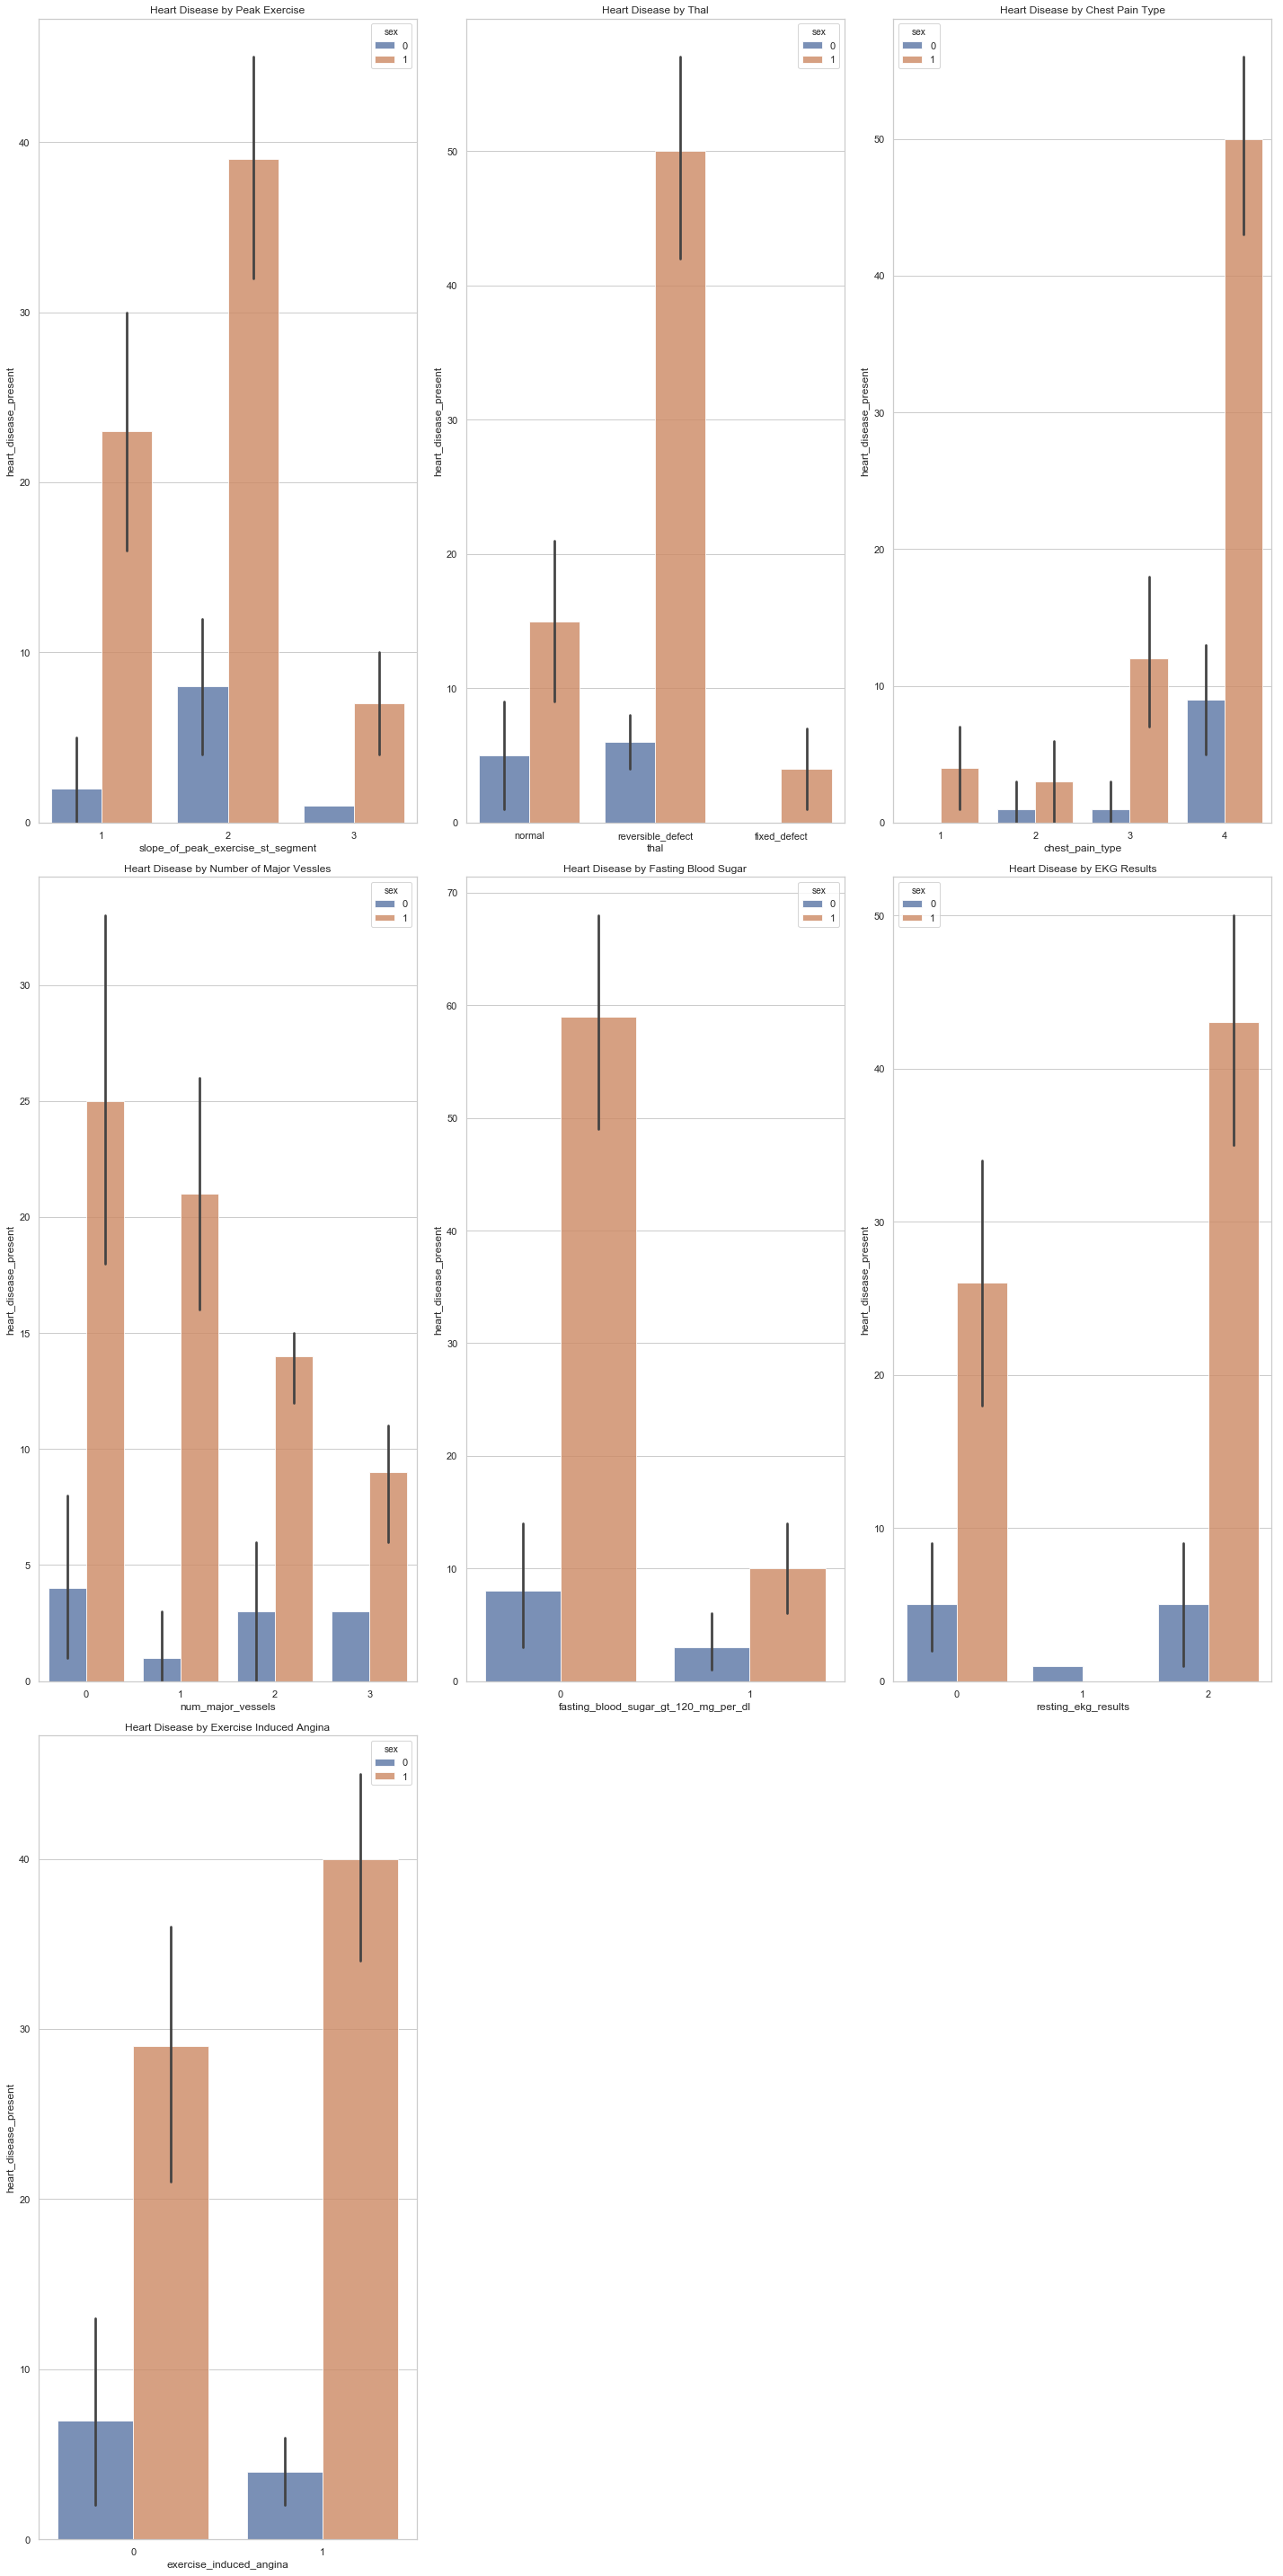

In [261]:
fig, ax = plt.subplots(2, 3, figsize=(20,40))
#fig, axes = plt.subplots(nrows=4, ncols=4)
#subplot(row,column,position)


plt.subplot(3,3,1)
sns.set(style='whitegrid')
x=train_3.slope_of_peak_exercise_st_segment
y="heart_disease_present"
ax = sns.barplot(x,y,hue="sex", data=train_3, estimator=sum, alpha=0.8)
plt.title('Heart Disease by Peak Exercise')

plt.subplot(3,3,2)
sns.set(style='whitegrid')
x=train_3.thal
y="heart_disease_present"
ax = sns.barplot(x,y,hue="sex", data=train_3, estimator=sum, alpha=0.8)
plt.title('Heart Disease by Thal')

plt.subplot(3,3,3)
sns.set(style='whitegrid')
x=train_3.chest_pain_type
y="heart_disease_present"
ax = sns.barplot(x,y,hue="sex", data=train_3, estimator=sum, alpha=0.8)
plt.title('Heart Disease by Chest Pain Type')

plt.subplot(3,3,4)
sns.set(style='whitegrid')
x=train_3.num_major_vessels
y="heart_disease_present"
ax = sns.barplot(x,y,hue="sex", data=train_3, estimator=sum, alpha=0.8)
plt.title('Heart Disease by Number of Major Vessles')

plt.subplot(3,3,5)
sns.set(style='whitegrid')
x=train_3.fasting_blood_sugar_gt_120_mg_per_dl
y="heart_disease_present"
ax = sns.barplot(x,y,hue="sex", data=train_3, estimator=sum, alpha=0.8)
plt.title('Heart Disease by Fasting Blood Sugar')

plt.subplot(3,3,6)
sns.set(style='whitegrid')
x=train_3.resting_ekg_results
y="heart_disease_present"
ax = sns.barplot(x,y,hue="sex", data=train_3, estimator=sum, alpha=0.8)
plt.title('Heart Disease by EKG Results')

plt.subplot(3,3,7)
sns.set(style='whitegrid')
x=train_3.exercise_induced_angina
y="heart_disease_present"
ax = sns.barplot(x,y,hue="sex", data=train_3, estimator=sum, alpha=0.8)
plt.title('Heart Disease by Exercise Induced Angina')


fig.tight_layout()


In [262]:
train_4=train_3.copy()

train_4.drop(['heart_disease_present'], axis=1)

train_4.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,age_group
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0,40-49
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0,50-59
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1,70+
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1,40-49
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0,50-59


# Data Preparation 

In [263]:
train_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 16 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
heart_disease_present                   180 non-null int64
age_gr

In [264]:
train_4['resting_ekg_results'].unique()

array([2, 0, 1], dtype=int64)

In [265]:
train_5 =pd.get_dummies(data=train_4, columns=['slope_of_peak_exercise_st_segment','thal','chest_pain_type','num_major_vessels','resting_ekg_results'], drop_first=True)
train_5.head(10)

,patient_id,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,age_group,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,thal_normal,thal_reversible_defect,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,resting_ekg_results_1,resting_ekg_results_2
0,0z64un,128,0,308,0.0,1,45,170,0,0,40-49,0,0,1,0,1,0,0,0,0,0,0,1
1,ryoo3j,110,0,214,1.6,0,54,158,0,0,50-59,1,0,1,0,0,1,0,0,0,0,0,0
2,yt1s1x,125,0,304,0.0,1,77,162,1,1,70+,0,0,1,0,0,0,1,0,0,1,0,1
3,l2xjde,152,0,223,0.0,1,40,181,0,1,40-49,0,0,0,1,0,0,1,0,0,0,0,0
4,oyt4ek,178,0,270,4.2,1,59,145,0,0,50-59,0,1,0,1,0,0,0,0,0,0,0,1
5,ldukkw,130,0,180,0.0,1,42,150,0,0,40-49,0,0,1,0,0,1,0,0,0,0,0,0
6,2gbyh9,150,0,258,2.6,0,60,157,0,1,60-69,1,0,0,1,0,0,1,0,1,0,0,1
7,daa9kp,150,0,276,0.6,1,57,112,1,1,50-59,1,0,0,0,0,0,1,1,0,0,0,1
8,3nwy2n,170,0,326,3.4,1,59,140,1,1,50-59,0,1,0,1,0,0,1,0,0,0,0,1
9,1r508r,120,0,219,1.6,0,50,158,0,0,50-59,1,0,1,0,0,1,0,0,0,0,0,0


In [266]:
train_5.columns

Index(['patient_id', 'resting_blood_pressure',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'serum_cholesterol_mg_per_dl',
       'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'heart_disease_present', 'age_group',
       'slope_of_peak_exercise_st_segment_2',
       'slope_of_peak_exercise_st_segment_3', 'thal_normal',
       'thal_reversible_defect', 'chest_pain_type_2', 'chest_pain_type_3',
       'chest_pain_type_4', 'num_major_vessels_1', 'num_major_vessels_2',
       'num_major_vessels_3', 'resting_ekg_results_1',
       'resting_ekg_results_2'],
      dtype='object')

In [267]:
train_4['thal'].unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [268]:
len(train_5.columns)

23

# Point-biserial correlation coefficient  (pearson correlation for continuous and categorical variables). 

In [269]:
corr_set =pd.get_dummies(data=train_4, columns=['slope_of_peak_exercise_st_segment','thal','chest_pain_type','num_major_vessels','resting_ekg_results'], drop_first=False)
corr_set

,patient_id,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,age_group,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,thal_fixed_defect,thal_normal,thal_reversible_defect,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2
0,0z64un,128,0,308,0.0,1,45,170,0,0,40-49,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
1,ryoo3j,110,0,214,1.6,0,54,158,0,0,50-59,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
2,yt1s1x,125,0,304,0.0,1,77,162,1,1,70+,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
3,l2xjde,152,0,223,0.0,1,40,181,0,1,40-49,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0
4,oyt4ek,178,0,270,4.2,1,59,145,0,0,50-59,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1
5,ldukkw,130,0,180,0.0,1,42,150,0,0,40-49,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
6,2gbyh9,150,0,258,2.6,0,60,157,0,1,60-69,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
7,daa9kp,150,0,276,0.6,1,57,112,1,1,50-59,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
8,3nwy2n,170,0,326,3.4,1,59,140,1,1,50-59,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1
9,1r508r,120,0,219,1.6,0,50,158,0,0,50-59,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0


In [270]:
cols = list(corr_set.columns.values)
cols

['patient_id',
 'resting_blood_pressure',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'sex',
 'age',
 'max_heart_rate_achieved',
 'exercise_induced_angina',
 'heart_disease_present',
 'age_group',
 'slope_of_peak_exercise_st_segment_1',
 'slope_of_peak_exercise_st_segment_2',
 'slope_of_peak_exercise_st_segment_3',
 'thal_fixed_defect',
 'thal_normal',
 'thal_reversible_defect',
 'chest_pain_type_1',
 'chest_pain_type_2',
 'chest_pain_type_3',
 'chest_pain_type_4',
 'num_major_vessels_0',
 'num_major_vessels_1',
 'num_major_vessels_2',
 'num_major_vessels_3',
 'resting_ekg_results_0',
 'resting_ekg_results_1',
 'resting_ekg_results_2']

In [271]:
corr_set= corr_set.reindex(columns=['heart_disease_present','patient_id','resting_blood_pressure','fasting_blood_sugar_gt_120_mg_per_dl','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','sex','age','max_heart_rate_achieved','exercise_induced_angina','age_group','slope_of_peak_exercise_st_segment_1','slope_of_peak_exercise_st_segment_2','slope_of_peak_exercise_st_segment_3','thal_fixed_defect','thal_normal','thal_reversible_defect','chest_pain_type_1','chest_pain_type_2','chest_pain_type_3','chest_pain_type_4','num_major_vessels_0','num_major_vessels_1','num_major_vessels_2','num_major_vessels_3','resting_ekg_results_0','resting_ekg_results_1','resting_ekg_results_2'])
corr_set

,heart_disease_present,patient_id,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,age_group,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,thal_fixed_defect,thal_normal,thal_reversible_defect,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2
0,0,0z64un,128,0,308,0.0,1,45,170,0,40-49,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
1,0,ryoo3j,110,0,214,1.6,0,54,158,0,50-59,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
2,1,yt1s1x,125,0,304,0.0,1,77,162,1,70+,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
3,1,l2xjde,152,0,223,0.0,1,40,181,0,40-49,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0
4,0,oyt4ek,178,0,270,4.2,1,59,145,0,50-59,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1
5,0,ldukkw,130,0,180,0.0,1,42,150,0,40-49,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
6,1,2gbyh9,150,0,258,2.6,0,60,157,0,60-69,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
7,1,daa9kp,150,0,276,0.6,1,57,112,1,50-59,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
8,1,3nwy2n,170,0,326,3.4,1,59,140,1,50-59,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1
9,0,1r508r,120,0,219,1.6,0,50,158,0,50-59,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0


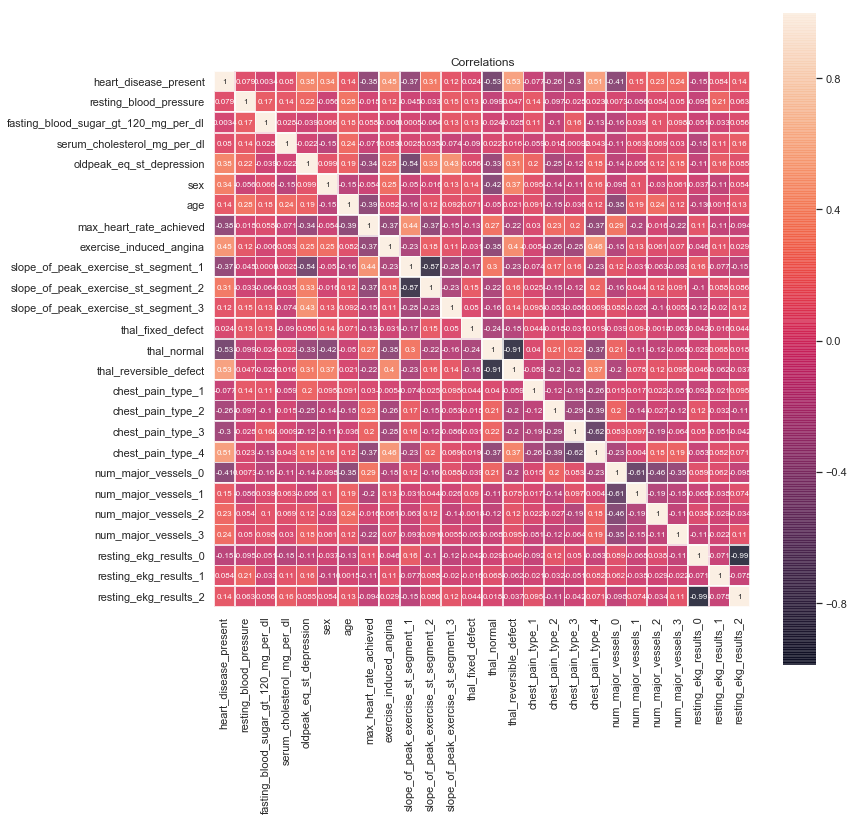

In [272]:
for_corr = corr_set.drop(columns=['patient_id','age_group'], axis=1)
corrmat_LE = for_corr.corr()

fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(corrmat_LE, square=True, annot=True, linewidths=.5, ax=ax, alpha=0.8, annot_kws={"size":8})
plt.title("Correlations")
ax.tick_params(labelsize=11)


plt.show()

# Splitting Datasets 

In [273]:
X= train_5.drop(columns=['patient_id','age_group','heart_disease_present'],axis=1)
Y= train_outcome.drop('patient_id',axis=1)

In [274]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, 
                                                    random_state=101)

In [275]:
X.head()

,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,thal_normal,thal_reversible_defect,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,resting_ekg_results_1,resting_ekg_results_2
0,128,0,308,0.0,1,45,170,0,0,0,1,0,1,0,0,0,0,0,0,1
1,110,0,214,1.6,0,54,158,0,1,0,1,0,0,1,0,0,0,0,0,0
2,125,0,304,0.0,1,77,162,1,0,0,1,0,0,0,1,0,0,1,0,1
3,152,0,223,0.0,1,40,181,0,0,0,0,1,0,0,1,0,0,0,0,0
4,178,0,270,4.2,1,59,145,0,0,1,0,1,0,0,0,0,0,0,0,1


In [276]:
Y.head()

,heart_disease_present
0,0
1,0
2,1
3,1
4,0


In [277]:
len (X.columns)

20

# Model : Individual Predictors

# Naive Bayes

### Naive Bayes does not work for mixed data types. So the data is divided between Categorical and Continuous. The former is used in the Bernoulli model, while the later is used in the Guassian model. In the end, the probabilities for outcomes from both models are added and averaged.

## Bernoulli NB 

In [278]:
#Categorical Variables 
X1=X.drop(columns=['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','max_heart_rate_achieved','age'],axis=1)
X1.head()

,fasting_blood_sugar_gt_120_mg_per_dl,sex,exercise_induced_angina,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,thal_normal,thal_reversible_defect,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,resting_ekg_results_1,resting_ekg_results_2
0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
2,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1
3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
4,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1


In [279]:
X_train, X_test, y_train, y_test = train_test_split(X1,Y, test_size=0.30, 
                                                    random_state=101)

In [280]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

bnb = BernoulliNB()

bnb.fit(X_train, y_train)

y_preds_train = bnb.predict(X_train)
y_preds_test = bnb.predict(X_test)


print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 0.8492063492063492
Testing set accuracy is: 0.8148148148148148


In [281]:
from sklearn.metrics import classification_report
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_train,y_preds_train))
print("\033[1m"+'Testing Set\n'+'\033[0m',classification_report(y_test,y_preds_test))

#add confusion matrix !!!!!
#at the end, type ii error, precision focus on that in the conclusion matrix

Training Set
               precision    recall  f1-score   support

           0       0.86      0.89      0.88        76
           1       0.83      0.78      0.80        50

   micro avg       0.85      0.85      0.85       126
   macro avg       0.85      0.84      0.84       126
weighted avg       0.85      0.85      0.85       126

Testing Set
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.86      0.80      0.83        30

   micro avg       0.81      0.81      0.81        54
   macro avg       0.81      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54



In [282]:
BNB = bnb.fit(X_train, y_train)

y_preds_train1_X1 = bnb.predict_proba(X_train)[:,1]
y_preds_test1_X1 = bnb.predict_proba(X_test)[:,1]

## Gaussian NB

In [283]:
#continuous features 
X2=X.drop(columns=['fasting_blood_sugar_gt_120_mg_per_dl','sex','exercise_induced_angina','slope_of_peak_exercise_st_segment_2','slope_of_peak_exercise_st_segment_3','thal_normal','thal_reversible_defect','chest_pain_type_2','chest_pain_type_3','chest_pain_type_4','num_major_vessels_1','num_major_vessels_2','num_major_vessels_3','resting_ekg_results_1','resting_ekg_results_2'],axis=1)
X2.head()

,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved
0,128,308,0.0,45,170
1,110,214,1.6,54,158
2,125,304,0.0,77,162
3,152,223,0.0,40,181
4,178,270,4.2,59,145


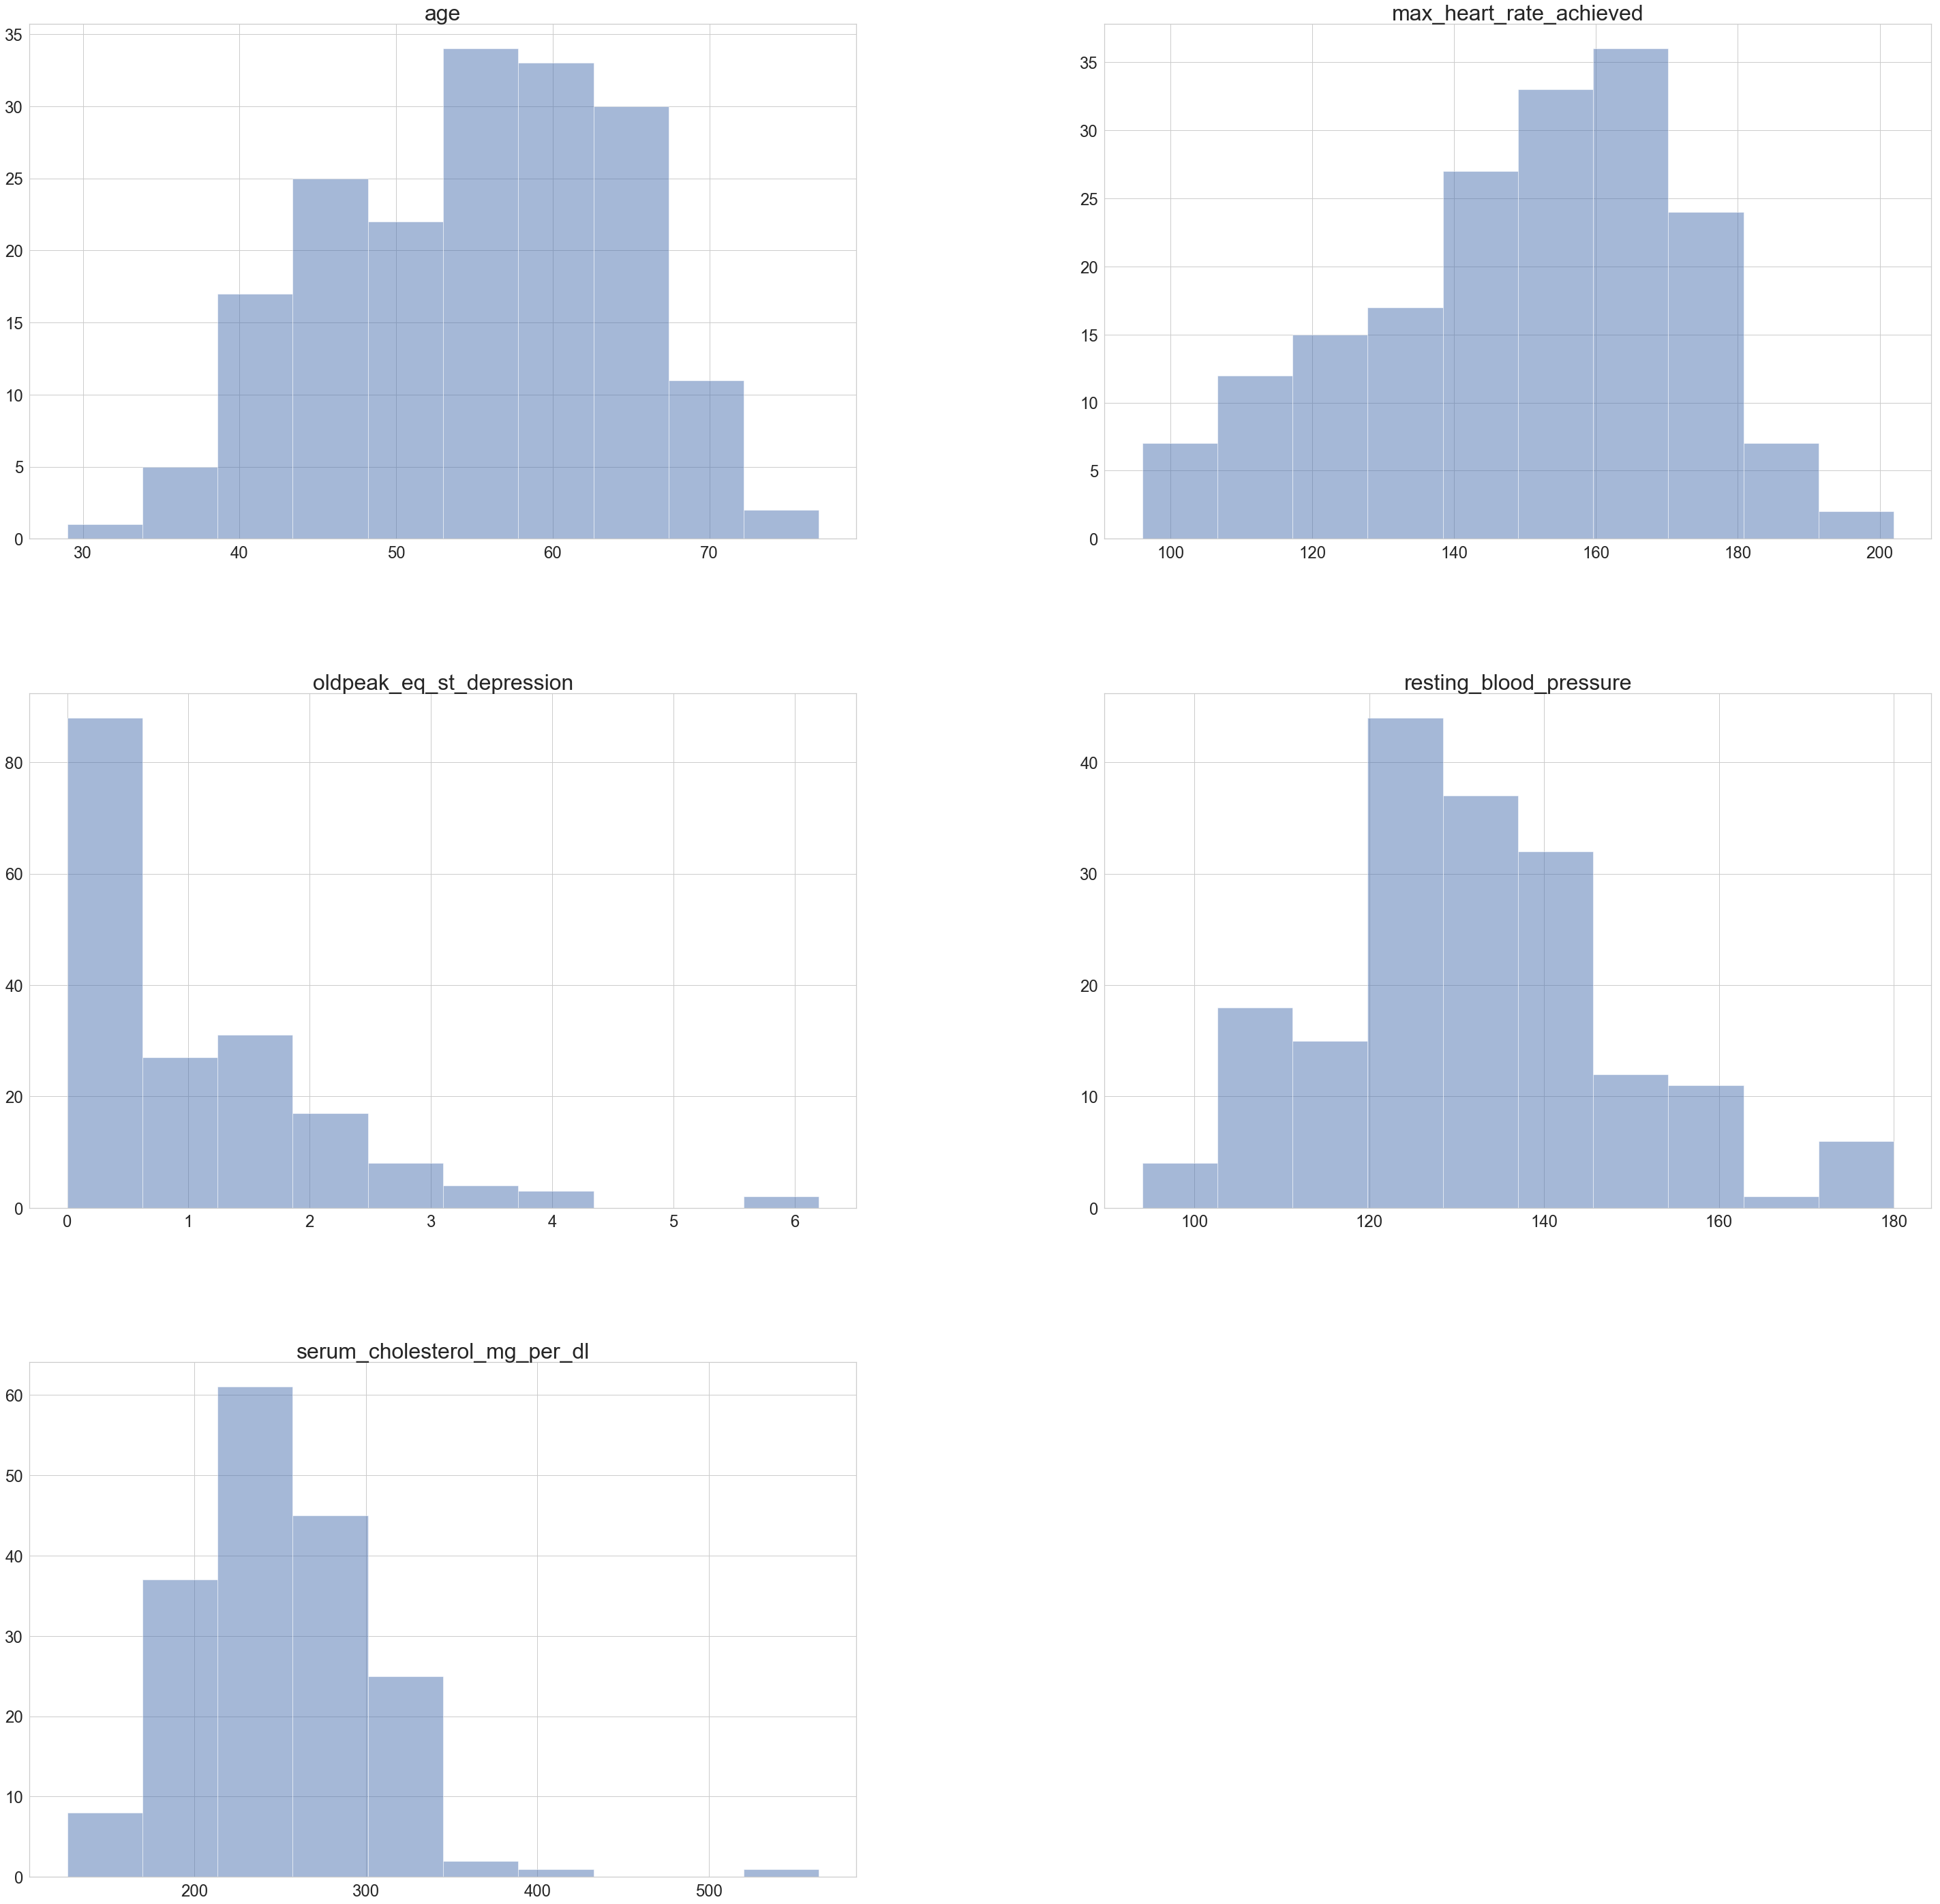

In [284]:
import matplotlib

params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)
hist = X2.hist(bins=10, figsize=(50,50), alpha=0.5)
plt.show()

### **One of the assumptions for Guassian NB is that the data is normally distributed.To normalize the data, Box Cox Transformation cannot be used, because the data contains 0 values.Instead the data is squareroot transformed. While the p-values point to the fact that some data are significantly different from normally distributed data, the data is still useable.**

In [285]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

col_list = X2[['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','max_heart_rate_achieved','age']]

for col in col_list:
    jb_stats = jarque_bera(np.sqrt(X2[col]))
    norm_stats = normaltest(np.sqrt(X2[col]))
    print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
    print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
    print("*******************************************************************************************************")

Jarque-Bera test statistics is 6.744065952320015 and p value is 0.03431979504851723
Normality test statistics is 6.933093044078929 and p value is 0.03122467841322747
*******************************************************************************************************
Jarque-Bera test statistics is 62.23599502848894 and p value is 3.064215547965432e-14
Normality test statistics is 24.33503448959997 and p value is 5.196541526010349e-06
*******************************************************************************************************
Jarque-Bera test statistics is 8.597982770298712 and p value is 0.013582251366317522
Normality test statistics is 35.29508046129561 and p value is 2.166559690294999e-08
*******************************************************************************************************
Jarque-Bera test statistics is 9.863408634696304 and p value is 0.007214197515911014
Normality test statistics is 9.470408473698184 and p value is 0.008780655315241508
***************

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X2,Y, test_size=0.30, 
                                                    random_state=101)

In [287]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_preds_train = gnb.predict(X_train)
y_preds_test = gnb.predict(X_test)


print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 0.6984126984126984
Testing set accuracy is: 0.6851851851851852


In [288]:
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_train,y_preds_train))
print("\033[1m"+'Testing Set\n'+'\033[0m',classification_report(y_test,y_preds_test))

Training Set
               precision    recall  f1-score   support

           0       0.72      0.82      0.77        76
           1       0.65      0.52      0.58        50

   micro avg       0.70      0.70      0.70       126
   macro avg       0.69      0.67      0.67       126
weighted avg       0.69      0.70      0.69       126

Testing Set
               precision    recall  f1-score   support

           0       0.60      0.88      0.71        24
           1       0.84      0.53      0.65        30

   micro avg       0.69      0.69      0.69        54
   macro avg       0.72      0.70      0.68        54
weighted avg       0.73      0.69      0.68        54



In [289]:
GNB = gnb.fit(X_train, y_train)

y_preds_train1_X2 = gnb.predict_proba(X_train)[:,1]
y_preds_test1_X2 = gnb.predict_proba(X_test)[:,1]

In [290]:
train_proba = (np.add(y_preds_train1_X1, y_preds_train1_X2))/2
test_proba = (np.add(y_preds_test1_X1,y_preds_test1_X2))/2

In [291]:
y_train_preds_combined = np.where(train_proba>0.5, 1, 0)
y_test_preds_combined = np.where(test_proba>0.5, 1, 0)

In [292]:
X= train_5.drop(columns=['patient_id','age_group','heart_disease_present'],axis=1)
Y= train_outcome.drop('patient_id',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, 
                                                    random_state=101)

In [293]:
y_test_preds_combined

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [294]:
NB_Training_Accuracy_Score = metrics.accuracy_score(y_train, y_train_preds_combined)
NB_Testing_Accuracy_Score= metrics.accuracy_score(y_test, y_test_preds_combined)
print('Training set accuracy is:',metrics.accuracy_score(y_train, y_train_preds_combined))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_test_preds_combined))

Training set accuracy is: 0.8253968253968254
Testing set accuracy is: 0.8333333333333334


In [295]:
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_train,y_train_preds_combined))
print("\033[1m"+'Testing Set\n'+'\033[0m',classification_report(y_test,y_test_preds_combined))

Training Set
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        76
           1       0.80      0.74      0.77        50

   micro avg       0.83      0.83      0.83       126
   macro avg       0.82      0.81      0.81       126
weighted avg       0.82      0.83      0.82       126

Testing Set
               precision    recall  f1-score   support

           0       0.76      0.92      0.83        24
           1       0.92      0.77      0.84        30

   micro avg       0.83      0.83      0.83        54
   macro avg       0.84      0.84      0.83        54
weighted avg       0.85      0.83      0.83        54



## Feature Engineering for Gaussian NB

In [296]:
X2.columns

Index(['resting_blood_pressure', 'serum_cholesterol_mg_per_dl',
       'oldpeak_eq_st_depression', 'age', 'max_heart_rate_achieved'],
      dtype='object')

In [297]:
X2['eng_1']=X2['age']*X2['oldpeak_eq_st_depression']
X2=X2.drop(columns=['age','oldpeak_eq_st_depression'], axis=1)
X2.head()

,resting_blood_pressure,serum_cholesterol_mg_per_dl,max_heart_rate_achieved,eng_1
0,128,308,170,0.0
1,110,214,158,86.4
2,125,304,162,0.0
3,152,223,181,0.0
4,178,270,145,247.8


In [298]:
X_train, X_test, y_train, y_test = train_test_split(X2,Y, test_size=0.30, 
                                                    random_state=101)

In [299]:
gnb = GaussianNB()

GNB = gnb.fit(X_train, y_train)

y_preds_train = gnb.predict(X_train)
y_preds_test = gnb.predict(X_test)


print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 0.7142857142857143
Testing set accuracy is: 0.7222222222222222


### The accuracy for GNB before feature engineering is higher. So that is the final one that will be used.

In [300]:
print ('Training Set:',NB_Training_Accuracy_Score)
print ('Testing Set:',NB_Testing_Accuracy_Score)

Training Set: 0.8253968253968254
Testing Set: 0.8333333333333334


In [301]:
GNB_Score = model_selection.cross_val_score(GNB, X, Y, cv=3, scoring = 'accuracy')
BNB_Score = model_selection.cross_val_score(BNB, X, Y, cv = 3, scoring = 'accuracy')

NB_Score = (GNB_Score+BNB_Score)/2
print (NB_Score)

[0.78688525 0.86666667 0.74576271]


In [302]:
NB_Score = pd.DataFrame(NB_Score)  
NB_Score.rename(columns={NB_Score.columns[0]: 'Naive Bayes' }, inplace = True)
print (NB_Score)

   Naive Bayes
0  0.786885   
1  0.866667   
2  0.745763   


# Logistic Regression

In [303]:
X= train_5.drop(columns=['patient_id','age_group','heart_disease_present'],axis=1)
Y= train_outcome.drop('patient_id',axis=1)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, 
                                                    random_state=101)

In [304]:
from sklearn.linear_model import LogisticRegression

logmodel=LogisticRegression()
LM = logmodel.fit(X_train, y_train)

y_preds_train = logmodel.predict(X_train)
y_preds_test = logmodel.predict(X_test)

from sklearn import metrics

Logistic_Regression_Training_Accuracy_Score=metrics.accuracy_score(y_train, y_preds_train)
Logistic_Regression_Testing_Accuracy_Score=metrics.accuracy_score(y_test, y_preds_test)

print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 0.8492063492063492
Testing set accuracy is: 0.8333333333333334


In [305]:
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_train,y_preds_train))
print("\033[1m"+'Testing Set\n'+'\033[0m',classification_report(y_test,y_preds_test))

Training Set
               precision    recall  f1-score   support

           0       0.85      0.91      0.88        76
           1       0.84      0.76      0.80        50

   micro avg       0.85      0.85      0.85       126
   macro avg       0.85      0.83      0.84       126
weighted avg       0.85      0.85      0.85       126

Testing Set
               precision    recall  f1-score   support

           0       0.76      0.92      0.83        24
           1       0.92      0.77      0.84        30

   micro avg       0.83      0.83      0.83        54
   macro avg       0.84      0.84      0.83        54
weighted avg       0.85      0.83      0.83        54



# Tuning hyperparameters for Logistic Regression

In [306]:
logmodel1=LogisticRegression(C= 0.1, penalty='l1')
LM1=logmodel1.fit(X_train, y_train)
y_preds_train = logmodel1.predict(X_train)
y_preds_test = logmodel1.predict(X_test)
Logistic_Regression_Training_Accuracy_Score=metrics.accuracy_score(y_train, y_preds_train)
Logistic_Regression_Testing_Accuracy_Score=metrics.accuracy_score(y_test, y_preds_test)

print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 0.7698412698412699
Testing set accuracy is: 0.7407407407407407


In [307]:
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_train,y_preds_train))
print("\033[1m"+'Testing Set\n'+'\033[0m',classification_report(y_test,y_preds_test))

Training Set
               precision    recall  f1-score   support

           0       0.75      0.92      0.83        76
           1       0.82      0.54      0.65        50

   micro avg       0.77      0.77      0.77       126
   macro avg       0.79      0.73      0.74       126
weighted avg       0.78      0.77      0.76       126

Testing Set
               precision    recall  f1-score   support

           0       0.64      0.96      0.77        24
           1       0.94      0.57      0.71        30

   micro avg       0.74      0.74      0.74        54
   macro avg       0.79      0.76      0.74        54
weighted avg       0.81      0.74      0.73        54



In [416]:
logmodel2=LogisticRegression(C= 0.5, penalty='l2')
LM2=logmodel2.fit(X_train, y_train)
y_preds_train = logmodel2.predict(X_train)
y_preds_test = logmodel2.predict(X_test)
Logistic_Regression_Training_Accuracy_Score=metrics.accuracy_score(y_train, y_preds_train)
Logistic_Regression_Testing_Accuracy_Score=metrics.accuracy_score(y_test, y_preds_test)

print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 0.8492063492063492
Testing set accuracy is: 0.8333333333333334


In [417]:
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_train,y_preds_train))
print("\033[1m"+'Testing Set\n'+'\033[0m',classification_report(y_test,y_preds_test))

Training Set
               precision    recall  f1-score   support

           0       0.85      0.91      0.88        76
           1       0.84      0.76      0.80        50

   micro avg       0.85      0.85      0.85       126
   macro avg       0.85      0.83      0.84       126
weighted avg       0.85      0.85      0.85       126

Testing Set
               precision    recall  f1-score   support

           0       0.76      0.92      0.83        24
           1       0.92      0.77      0.84        30

   micro avg       0.83      0.83      0.83        54
   macro avg       0.84      0.84      0.83        54
weighted avg       0.85      0.83      0.83        54



In [310]:
LM_Score = model_selection.cross_val_score(LM, X, Y, cv=3, scoring = 'accuracy')
print (LM_Score)

[0.83606557 0.81666667 0.71186441]


In [311]:
LM_Score = pd.DataFrame(LM_Score)  
LM_Score.rename(columns={LM_Score.columns[0]: 'Logistic Regression' }, inplace = True)
print (LM_Score)

   Logistic Regression
0  0.836066           
1  0.816667           
2  0.711864           


### The model performs reasonably well, with relatively high accuracies for both sets and a low generalization gap.

# KNN Classifier 

In [312]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

KNN = knn.fit(X_train, y_train)

y_preds_train = knn.predict(X_train)
y_preds_test = knn.predict(X_test)


print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 1.0
Testing set accuracy is: 0.46296296296296297


In [313]:
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_train,y_preds_train))
print("\033[1m"+'Testing Set\n'+'\033[0m',classification_report(y_test,y_preds_test))

Training Set
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

   micro avg       1.00      1.00      1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Testing Set
               precision    recall  f1-score   support

           0       0.42      0.58      0.49        24
           1       0.52      0.37      0.43        30

   micro avg       0.46      0.46      0.46        54
   macro avg       0.47      0.47      0.46        54
weighted avg       0.48      0.46      0.46        54



KNN Classifier can be used with mixed data types, but the model will be heavily biaised in the direction of categorical data. So only include the most necessary features. 

### Tuning Hyperparameters KNN Classifier 

#### Tuning Classifier (5 Neighbours)

In [314]:
knn1 = KNeighborsClassifier(weights='distance',n_neighbors=5,leaf_size=1,algorithm='auto')
KNN1 = knn1.fit(X_train,y_train)

y_preds_train = knn1.predict(X_train)
y_preds_test = knn1.predict(X_test)


print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 1.0
Testing set accuracy is: 0.48148148148148145


In [315]:
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_train,y_preds_train))
print("\033[1m"+'Testing Set\n'+'\033[0m',classification_report(y_test,y_preds_test))

Training Set
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

   micro avg       1.00      1.00      1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Testing Set
               precision    recall  f1-score   support

           0       0.44      0.58      0.50        24
           1       0.55      0.40      0.46        30

   micro avg       0.48      0.48      0.48        54
   macro avg       0.49      0.49      0.48        54
weighted avg       0.50      0.48      0.48        54



#### Tuning Classifier (7 Neighbors)

In [316]:
knn2 = KNeighborsClassifier(weights='distance',n_neighbors=7,leaf_size=1,algorithm='auto')
KNN2 = knn2.fit(X_train,y_train)

y_preds_train = knn2.predict(X_train)
y_preds_test = knn2.predict(X_test)


print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 1.0
Testing set accuracy is: 0.42592592592592593


In [317]:
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_train,y_preds_train))
print("\033[1m"+'Testing Set\n'+'\033[0m',classification_report(y_test,y_preds_test))

Training Set
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

   micro avg       1.00      1.00      1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Testing Set
               precision    recall  f1-score   support

           0       0.39      0.54      0.46        24
           1       0.48      0.33      0.39        30

   micro avg       0.43      0.43      0.43        54
   macro avg       0.44      0.44      0.42        54
weighted avg       0.44      0.43      0.42        54



#### Tuning Classifier (10 neighbors)

In [318]:
knn3 = KNeighborsClassifier(weights='distance',n_neighbors=10,leaf_size=1,algorithm='auto')
KNN3 = knn3.fit(X_train,y_train)

y_preds_train = knn3.predict(X_train)
y_preds_test = knn3.predict(X_test)


print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 1.0
Testing set accuracy is: 0.48148148148148145


In [319]:
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_train,y_preds_train))
print("\033[1m"+'Testing Set\n'+'\033[0m',classification_report(y_test,y_preds_test))

Training Set
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

   micro avg       1.00      1.00      1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Testing Set
               precision    recall  f1-score   support

           0       0.45      0.71      0.55        24
           1       0.56      0.30      0.39        30

   micro avg       0.48      0.48      0.48        54
   macro avg       0.50      0.50      0.47        54
weighted avg       0.51      0.48      0.46        54



## Rescaling Continuous Features

In [320]:
X3=X.copy()
Y3=Y.copy()

In [321]:
from scipy.stats import zscore
X3=X.drop(columns=['fasting_blood_sugar_gt_120_mg_per_dl','sex','exercise_induced_angina','slope_of_peak_exercise_st_segment_2','slope_of_peak_exercise_st_segment_3','thal_normal','thal_reversible_defect','chest_pain_type_2','chest_pain_type_3','chest_pain_type_4','num_major_vessels_1','num_major_vessels_2','num_major_vessels_3','resting_ekg_results_1','resting_ekg_results_2'],axis=1)
X3.apply(zscore)
X3.shape

(180, 5)

In [322]:
X4=X.copy()
X5=X4.drop(columns=['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','max_heart_rate_achieved','age'],axis=1)
X5.head()
X5.shape

(180, 15)

In [323]:
X6=pd.concat([X4,X5], axis=1, sort=False)
X6.shape

(180, 35)

# KNN After rescaling continuous features

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X6,Y3, test_size=0.30, 
                                                    random_state=101)

In [325]:
knn4 = KNeighborsClassifier(weights='distance',n_neighbors=2,leaf_size=100,algorithm='auto')
KNN4 = knn4.fit(X_train,y_train)

y_preds_train = knn4.predict(X_train)
y_preds_test = knn4.predict(X_test)


print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 1.0
Testing set accuracy is: 0.46296296296296297


There is a great deal of overfitting using KNN, potentially due to the high number of categorical features. Dropping some features might help.

In [326]:
X7=X6.drop(columns=['fasting_blood_sugar_gt_120_mg_per_dl','sex','exercise_induced_angina','slope_of_peak_exercise_st_segment_2','slope_of_peak_exercise_st_segment_3','resting_ekg_results_1','resting_ekg_results_2'],axis=1)
X7.columns

Index(['resting_blood_pressure', 'serum_cholesterol_mg_per_dl',
       'oldpeak_eq_st_depression', 'age', 'max_heart_rate_achieved',
       'thal_normal', 'thal_reversible_defect', 'chest_pain_type_2',
       'chest_pain_type_3', 'chest_pain_type_4', 'num_major_vessels_1',
       'num_major_vessels_2', 'num_major_vessels_3', 'thal_normal',
       'thal_reversible_defect', 'chest_pain_type_2', 'chest_pain_type_3',
       'chest_pain_type_4', 'num_major_vessels_1', 'num_major_vessels_2',
       'num_major_vessels_3'],
      dtype='object')

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X7,Y3, test_size=0.30, 
                                                    random_state=101)

In [328]:
knn5 = KNeighborsClassifier(weights='distance',n_neighbors=5,leaf_size=500,algorithm='auto')
KNN5 = knn5.fit(X_train,y_train)

y_preds_train = knn5.predict(X_train)
y_preds_test = knn5.predict(X_test)


print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 1.0
Testing set accuracy is: 0.48148148148148145


In [329]:
KNN_Training_Accuracy_Set = metrics.accuracy_score(y_train, y_preds_train)
KNN_Testing_Accuracy_Set= metrics.accuracy_score(y_test, y_preds_test)

## Even when applying several tuning techniques and dropping unneccessary categorical variable, there is a great deal of over-fitting, with a high generalization gap. 

In [330]:
KNN1_Score = model_selection.cross_val_score(KNN1, X, Y, cv=3, scoring = 'accuracy')
print (KNN1_Score)

[0.57377049 0.63333333 0.62711864]


In [331]:
KNN1_Score = pd.DataFrame(KNN1_Score)    
KNN1_Score.rename(columns={KNN1_Score.columns[0]: 'KNN' }, inplace = True)
print (KNN1_Score)

   KNN     
0  0.573770
1  0.633333
2  0.627119


# Decision Tree

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, 
                                                    random_state=101)

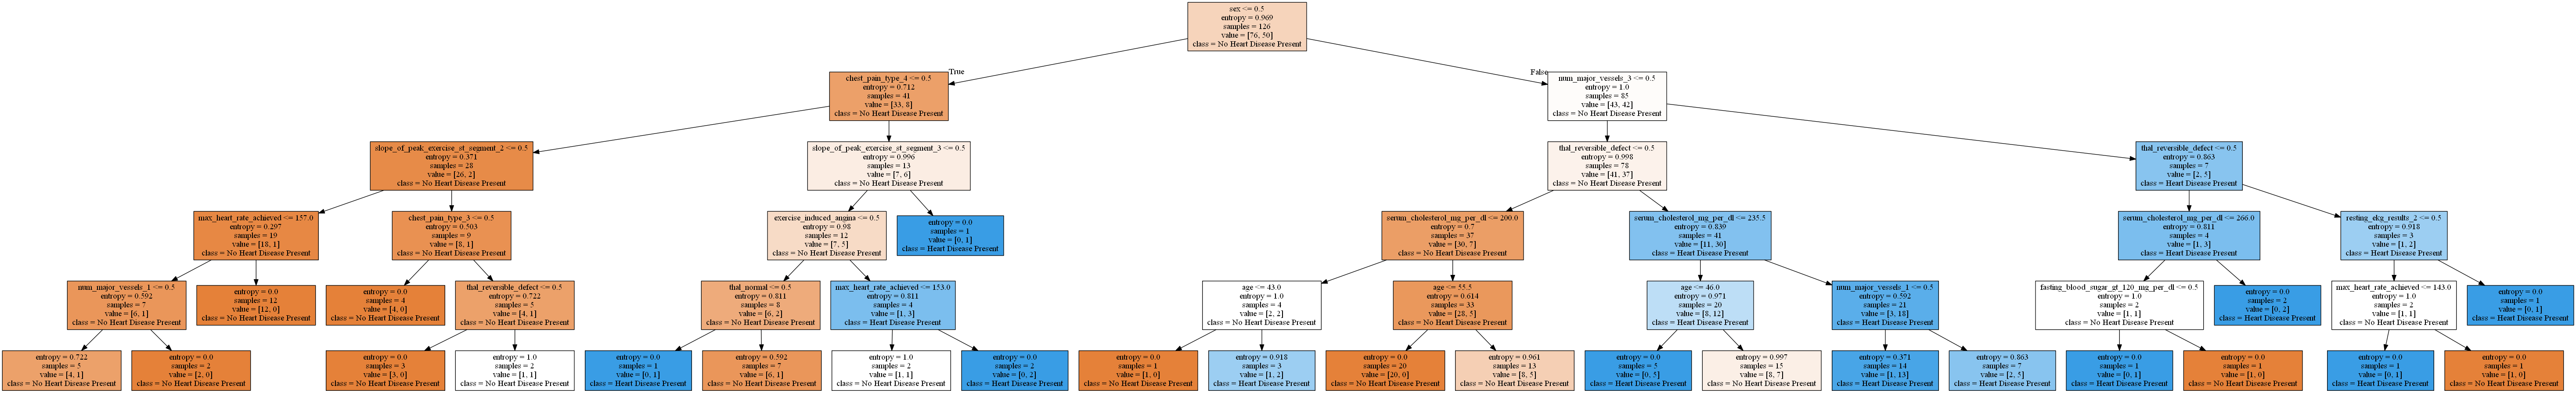

In [333]:
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=5,
    random_state = 1337
)

decision_tree.fit(X_train,y_train)

y_preds_train = decision_tree.predict(X_train)
y_preds_test = decision_tree.predict(X_test)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X_train.columns,
    class_names=['No Heart Disease Present', 'Heart Disease Present'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [334]:
print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 0.8412698412698413
Testing set accuracy is: 0.5740740740740741


In [335]:
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_train,y_preds_train))
print("\033[1m"+'Testing Set\n'+'\033[0m',classification_report(y_test,y_preds_test))

Training Set
               precision    recall  f1-score   support

           0       0.82      0.95      0.88        76
           1       0.89      0.68      0.77        50

   micro avg       0.84      0.84      0.84       126
   macro avg       0.86      0.81      0.83       126
weighted avg       0.85      0.84      0.84       126

Testing Set
               precision    recall  f1-score   support

           0       0.52      0.67      0.58        24
           1       0.65      0.50      0.57        30

   micro avg       0.57      0.57      0.57        54
   macro avg       0.58      0.58      0.57        54
weighted avg       0.59      0.57      0.57        54



#### Decision Tree Tuning

In [336]:
decision_tree2 = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=5,
    max_depth=5,
    random_state = 1337
)

DT2= decision_tree2.fit(X_train,y_train)

y_preds_train = decision_tree2.predict(X_train)
y_preds_test = decision_tree2.predict(X_test)

In [337]:
Decision_Tree_Training_Accuracy_Score=metrics.accuracy_score(y_train, y_preds_train)
Decsion_Tree_Testing_Accuracy_Score=metrics.accuracy_score(y_test, y_preds_test)

print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 0.8888888888888888
Testing set accuracy is: 0.7777777777777778


In [338]:
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_train,y_preds_train))
print("\033[1m"+'Testing Set\n'+'\033[0m',classification_report(y_test,y_preds_test))

Training Set
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        76
           1       0.89      0.82      0.85        50

   micro avg       0.89      0.89      0.89       126
   macro avg       0.89      0.88      0.88       126
weighted avg       0.89      0.89      0.89       126

Testing Set
               precision    recall  f1-score   support

           0       0.70      0.88      0.78        24
           1       0.88      0.70      0.78        30

   micro avg       0.78      0.78      0.78        54
   macro avg       0.79      0.79      0.78        54
weighted avg       0.80      0.78      0.78        54



In [339]:
decision_tree2 = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=7,
    max_depth=5,
    random_state = 1337
)

decision_tree2.fit(X_train,y_train)

y_preds_train = decision_tree2.predict(X_train)
y_preds_test = decision_tree2.predict(X_test)

In [340]:
print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 0.9047619047619048
Testing set accuracy is: 0.7222222222222222


In [341]:
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_train,y_preds_train))
print("\033[1m"+'Testing Set\n'+'\033[0m',classification_report(y_test,y_preds_test))

Training Set
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        76
           1       0.90      0.86      0.88        50

   micro avg       0.90      0.90      0.90       126
   macro avg       0.90      0.90      0.90       126
weighted avg       0.90      0.90      0.90       126

Testing Set
               precision    recall  f1-score   support

           0       0.66      0.79      0.72        24
           1       0.80      0.67      0.73        30

   micro avg       0.72      0.72      0.72        54
   macro avg       0.73      0.73      0.72        54
weighted avg       0.74      0.72      0.72        54



In [342]:
decision_tree2 = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=3,
    max_depth=3,
    random_state = 1337
)

decision_tree2.fit(X_train,y_train)

y_preds_train = decision_tree2.predict(X_train)
y_preds_test = decision_tree2.predict(X_test)

In [343]:
print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 0.8333333333333334
Testing set accuracy is: 0.7592592592592593


In [344]:
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_train,y_preds_train))
print("\033[1m"+'Testing Set\n'+'\033[0m',classification_report(y_test,y_preds_test))

Training Set
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        76
           1       0.81      0.76      0.78        50

   micro avg       0.83      0.83      0.83       126
   macro avg       0.83      0.82      0.82       126
weighted avg       0.83      0.83      0.83       126

Testing Set
               precision    recall  f1-score   support

           0       0.66      0.96      0.78        24
           1       0.95      0.60      0.73        30

   micro avg       0.76      0.76      0.76        54
   macro avg       0.80      0.78      0.76        54
weighted avg       0.82      0.76      0.75        54



### The best performing model is the one with 5 features, with a maximum depth of 5. It has the highest accuracies for both sets and the lowest generalization gap, hence the least level of over-fitting.

In [345]:
DT2_Score = model_selection.cross_val_score(DT2, X, Y, cv=3, scoring = 'accuracy')
print (DT2_Score)

[0.80327869 0.56666667 0.66101695]


In [346]:
DT2_Score = pd.DataFrame(DT2_Score)   
DT2_Score.rename(columns={DT2_Score.columns[0]: 'Decision Tree' }, inplace = True)
print (DT2_Score)

   Decision Tree
0  0.803279     
1  0.566667     
2  0.661017     


# Support Vector Machine Classifier

In [347]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear')

SVM = svm.fit(X_train,y_train)

y_preds_train = svm.predict(X_train)
y_preds_test = svm.predict(X_test)

In [348]:
SVM_Training_Accuracy_Score=metrics.accuracy_score(y_train, y_preds_train)
SVM_Testing_Accuracy_Score=metrics.accuracy_score(y_test, y_preds_test)

print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 0.8650793650793651
Testing set accuracy is: 0.8333333333333334


In [349]:
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_test,y_preds_test))
print("\033[1m"+"Testing Set\n"+"\033[0m",classification_report(y_train,y_preds_train))

Training Set
               precision    recall  f1-score   support

           0       0.74      0.96      0.84        24
           1       0.96      0.73      0.83        30

   micro avg       0.83      0.83      0.83        54
   macro avg       0.85      0.85      0.83        54
weighted avg       0.86      0.83      0.83        54

Testing Set
               precision    recall  f1-score   support

           0       0.86      0.93      0.89        76
           1       0.88      0.76      0.82        50

   micro avg       0.87      0.87      0.87       126
   macro avg       0.87      0.85      0.86       126
weighted avg       0.87      0.87      0.86       126



# Tuning SVC Hyperparameters

In [350]:
svm1 = SVC(kernel = 'linear', C=1, gamma=0.1)

SVM1 = svm1.fit(X_train,y_train)

y_preds_train1 = svm1.predict(X_train)
y_preds_test1 = svm1.predict(X_test)

In [351]:
SVM_Training_Accuracy_Score=metrics.accuracy_score(y_train, y_preds_train1)
SVM_Testing_Accuracy_Score=metrics.accuracy_score(y_test, y_preds_test1)

print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train1))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test1))

Training set accuracy is: 0.8650793650793651
Testing set accuracy is: 0.8333333333333334


In [352]:
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_test,y_preds_test1))
print("\033[1m"+"Testing Set\n"+"\033[0m",classification_report(y_train,y_preds_train1))

Training Set
               precision    recall  f1-score   support

           0       0.74      0.96      0.84        24
           1       0.96      0.73      0.83        30

   micro avg       0.83      0.83      0.83        54
   macro avg       0.85      0.85      0.83        54
weighted avg       0.86      0.83      0.83        54

Testing Set
               precision    recall  f1-score   support

           0       0.86      0.93      0.89        76
           1       0.88      0.76      0.82        50

   micro avg       0.87      0.87      0.87       126
   macro avg       0.87      0.85      0.86       126
weighted avg       0.87      0.87      0.86       126



In [353]:
svm2 = SVC(kernel = 'rbf', C=1, gamma=0.1)

SVM2 = svm2.fit(X_train,y_train)

y_preds_train2 = svm1.predict(X_train)
y_preds_test2 = svm1.predict(X_test)

In [354]:
SVM_Training_Accuracy_Score=metrics.accuracy_score(y_train, y_preds_train2)
SVM_Testing_Accuracy_Score=metrics.accuracy_score(y_test, y_preds_test2)

print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train2))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test2))

Training set accuracy is: 0.8650793650793651
Testing set accuracy is: 0.8333333333333334


In [355]:
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_test,y_preds_test2))
print("\033[1m"+"Testing Set\n"+"\033[0m",classification_report(y_train,y_preds_train2))

Training Set
               precision    recall  f1-score   support

           0       0.74      0.96      0.84        24
           1       0.96      0.73      0.83        30

   micro avg       0.83      0.83      0.83        54
   macro avg       0.85      0.85      0.83        54
weighted avg       0.86      0.83      0.83        54

Testing Set
               precision    recall  f1-score   support

           0       0.86      0.93      0.89        76
           1       0.88      0.76      0.82        50

   micro avg       0.87      0.87      0.87       126
   macro avg       0.87      0.85      0.86       126
weighted avg       0.87      0.87      0.86       126



In [356]:
SVM_Score = model_selection.cross_val_score(SVM, X, Y, cv=3, scoring = 'accuracy')
print (SVM_Score)

[0.81967213 0.85       0.69491525]


In [357]:
SVM_Score = pd.DataFrame(SVM_Score)   
SVM_Score.rename(columns={SVM_Score.columns[0]: 'SVM' }, inplace = True)
print (SVM_Score)

   SVM     
0  0.819672
1  0.850000
2  0.694915


# Model Comparison

In [358]:
#calcualting generalization gap
NB= NB_Training_Accuracy_Score - NB_Testing_Accuracy_Score
Log = Logistic_Regression_Training_Accuracy_Score-Logistic_Regression_Testing_Accuracy_Score
KNN = KNN_Training_Accuracy_Set- KNN_Testing_Accuracy_Set
Dec_Tree = Decision_Tree_Training_Accuracy_Score - Decsion_Tree_Testing_Accuracy_Score
SVC = SVM_Training_Accuracy_Score-SVM_Testing_Accuracy_Score
print ('[',NB,',',Log,',',KNN,',',Dec_Tree,']')

[ -0.00793650793650802 , 0.015873015873015817 , 0.5185185185185186 , 0.11111111111111105 ]


In [359]:
SUMMARY_TABLE = pd.DataFrame(np.array([['NB',NB_Training_Accuracy_Score,NB_Testing_Accuracy_Score], ['Log',Logistic_Regression_Training_Accuracy_Score,Logistic_Regression_Testing_Accuracy_Score], ['KNN',KNN_Training_Accuracy_Set,KNN_Testing_Accuracy_Set],['Dec_Tree',Decision_Tree_Training_Accuracy_Score,Decsion_Tree_Testing_Accuracy_Score],['SVM',SVM_Training_Accuracy_Score,SVM_Testing_Accuracy_Score]]),
                    columns=['Model', 'Train1', 'Test'])
SUMMARY_TABLE

,Model,Train1,Test
0,NB,0.8253968253968254,0.8333333333333334
1,Log,0.8492063492063492,0.8333333333333334
2,KNN,1.0,0.48148148148148145
3,Dec_Tree,0.8888888888888888,0.7777777777777778
4,SVM,0.8650793650793651,0.8333333333333334


In [360]:
colors = ["#0000FF","#FF9912"]

In [361]:
SUMMARY_TABLE1 = SUMMARY_TABLE.set_index(['Model'])

In [362]:
SUMMARY_TABLE1

,Train1,Test
Model,,
NB,0.8253968253968254,0.8333333333333334
Log,0.8492063492063492,0.8333333333333334
KNN,1.0,0.48148148148148145
Dec_Tree,0.8888888888888888,0.7777777777777778
SVM,0.8650793650793651,0.8333333333333334


In [363]:
SUMMARY_TABLE1["Train1"] = SUMMARY_TABLE1.Train1.astype(float)
SUMMARY_TABLE1["Test"] = SUMMARY_TABLE1.Test.astype(float)
SUMMARY_TABLE1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, NB to SVM
Data columns (total 2 columns):
Train1    5 non-null float64
Test      5 non-null float64
dtypes: float64(2)
memory usage: 120.0+ bytes


In [364]:
SUMMARY_TABLE1["Train"]= abs(SUMMARY_TABLE1["Train1"]-SUMMARY_TABLE1["Test"])

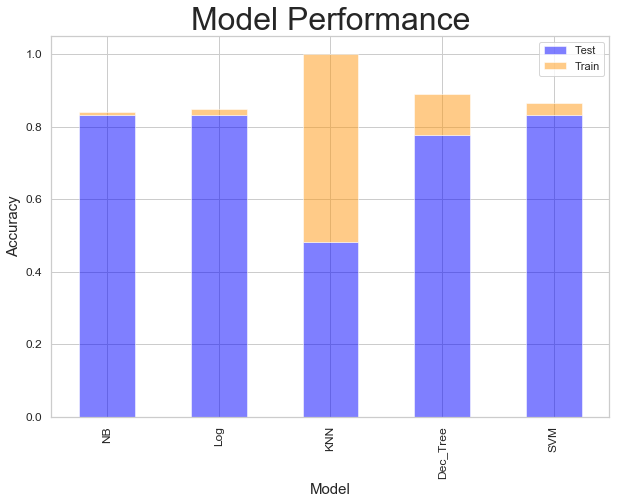

In [365]:
SUMMARY_TABLE1.loc[:,['Test','Train']].plot.bar(stacked=True, color=colors, alpha=0.5,figsize=(10,7))
plt.title('Model Performance')
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Model', fontsize=15)
plt.tick_params(labelsize=12)

plt.show()

# Ensemble Modelling: Part 1

# Random Forest

In [366]:
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier()

RFC = rfc.fit(X_train,y_train)

y_preds_train = rfc.predict(X_train)
y_preds_test = rfc.predict(X_test)

Random_Forest_Training_Accuracy_Score=metrics.accuracy_score(y_train, y_preds_train)
Random_Forest_Testing_Accuracy_Score=metrics.accuracy_score(y_test, y_preds_test)

print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 0.9920634920634921
Testing set accuracy is: 0.6851851851851852


In [367]:
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_train,y_preds_train))
print("\033[1m"+'Testing Set\n'+'\033[0m',classification_report(y_test,y_preds_test))

Training Set
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.98      0.99        50

   micro avg       0.99      0.99      0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

Testing Set
               precision    recall  f1-score   support

           0       0.59      0.92      0.72        24
           1       0.88      0.50      0.64        30

   micro avg       0.69      0.69      0.69        54
   macro avg       0.74      0.71      0.68        54
weighted avg       0.75      0.69      0.68        54



# Tuning Hyperparameters for RFC

In [368]:
#rfc1 = ensemble.RandomForestClassifier(n_estimators=100, max_depth=10,min_samples_leaf=1,min_samples_split=2)
rfc1 = ensemble.RandomForestClassifier(random_state=42, criterion ='gini', max_depth= 6, max_features = 'auto', n_estimators = 200, class_weight = 'balanced')
RFC1 = rfc1.fit(X_train,y_train)

y_preds_train = rfc1.predict(X_train)
y_preds_test = rfc1.predict(X_test)

Random_Forest_Training_Accuracy_Score=metrics.accuracy_score(y_train, y_preds_train)
Random_Forest_Testing_Accuracy_Score=metrics.accuracy_score(y_test, y_preds_test)

print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 1.0
Testing set accuracy is: 0.7962962962962963


In [369]:
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_train,y_preds_train))
print("\033[1m"+'Testing Set\n'+'\033[0m',classification_report(y_test,y_preds_test))

Training Set
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

   micro avg       1.00      1.00      1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Testing Set
               precision    recall  f1-score   support

           0       0.72      0.88      0.79        24
           1       0.88      0.73      0.80        30

   micro avg       0.80      0.80      0.80        54
   macro avg       0.80      0.80      0.80        54
weighted avg       0.81      0.80      0.80        54



In [370]:
rfc2 = ensemble.RandomForestClassifier(random_state=42, criterion ='entropy', max_depth= 4, max_features = 'auto', n_estimators = 200, class_weight = 'balanced')
RFC2 = rfc2.fit(X_train,y_train)

y_preds_train = rfc2.predict(X_train)
y_preds_test = rfc2.predict(X_test)

Random_Forest_Training_Accuracy_Score=metrics.accuracy_score(y_train, y_preds_train)
Random_Forest_Testing_Accuracy_Score=metrics.accuracy_score(y_test, y_preds_test)

print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 0.9206349206349206
Testing set accuracy is: 0.8148148148148148


In [371]:
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_train,y_preds_train))
print("\033[1m"+'Testing Set\n'+'\033[0m',classification_report(y_test,y_preds_test))

Training Set
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        76
           1       0.90      0.90      0.90        50

   micro avg       0.92      0.92      0.92       126
   macro avg       0.92      0.92      0.92       126
weighted avg       0.92      0.92      0.92       126

Testing Set
               precision    recall  f1-score   support

           0       0.75      0.88      0.81        24
           1       0.88      0.77      0.82        30

   micro avg       0.81      0.81      0.81        54
   macro avg       0.82      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54



In [372]:
RFC_Score = model_selection.cross_val_score(RFC2, X, Y, cv=3, scoring = 'accuracy')
print (RFC_Score)

[0.80327869 0.85       0.72881356]


In [373]:
RFC_Score = pd.DataFrame(RFC_Score)    
RFC_Score.rename(columns={RFC_Score.columns[0]: 'Random Forest' }, inplace = True)
print (RFC_Score)

   Random Forest
0  0.803279     
1  0.850000     
2  0.728814     


# RFC Feature Selection

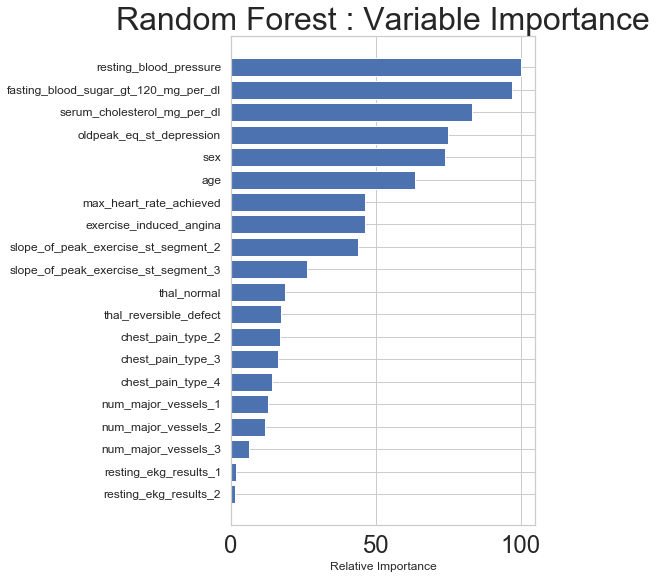

In [374]:
from sklearn.feature_selection import SelectKBest, f_classif
x_kbest = X[X.columns[SelectKBest(f_classif, k=20).fit(X, Y).get_support()]]

feature_importance=pd.Series(rfc2.feature_importances_,index=x_kbest.columns).sort_values(ascending=False)

fig = plt.figure(figsize = (12,9))
ax = fig.gca()

#feature_importance.plot(kind='bar', title='Tuned Random Forest: Feature Importances', ax=ax)
#plt.ylabel('Feature Importance Score')
#plt.savefig('Feature_Importance_TunedRFC.png')
#plt.tight_layout()
#plt.show()

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx], fontsize=12)
plt.xlabel('Relative Importance')
plt.title('Random Forest : Variable Importance')
plt.show()

# Bagging 

In [375]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

final_dt = DecisionTreeClassifier(max_leaf_nodes=10, max_depth=5)                   
final_bc = BaggingClassifier(base_estimator=final_dt, n_estimators=40, random_state=1, oob_score=True)

BAG= final_bc.fit(X_train, y_train)

final_preds_train = final_bc.predict(X_test)
final_preds_test = final_bc.predict(X_test)

acc_oob = final_bc.oob_score_
print('acc_occ score:',acc_oob)  

BAG_Training_Accuracy_Score=metrics.accuracy_score(y_train, y_preds_train)
BAG_Testing_Accuracy_Score=metrics.accuracy_score(y_test, y_preds_test)

print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

acc_occ score: 0.7777777777777778
Training set accuracy is: 0.9206349206349206
Testing set accuracy is: 0.8148148148148148


In [376]:
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_test,y_preds_test))
print("\033[1m"+"Testing Set\n"+"\033[0m",classification_report(y_train,y_preds_train))

Training Set
               precision    recall  f1-score   support

           0       0.75      0.88      0.81        24
           1       0.88      0.77      0.82        30

   micro avg       0.81      0.81      0.81        54
   macro avg       0.82      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54

Testing Set
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        76
           1       0.90      0.90      0.90        50

   micro avg       0.92      0.92      0.92       126
   macro avg       0.92      0.92      0.92       126
weighted avg       0.92      0.92      0.92       126



In [377]:
BAG_Score = model_selection.cross_val_score(BAG, X, Y, cv=3, scoring = 'accuracy')
print (BAG_Score)

[0.78688525 0.76666667 0.69491525]


In [378]:
BAG_Score = pd.DataFrame(BAG_Score)     
BAG_Score.rename(columns={BAG_Score.columns[0]: 'Bagging Model' }, inplace = True)
print (BAG_Score)

   Bagging Model
0  0.786885     
1  0.766667     
2  0.694915     


# Gradient Boosting Model

In [379]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [380]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

clf = ensemble.GradientBoostingClassifier(**params)
GBM = clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [381]:
Gradient_Boosting_Training_Accuracy_Score=metrics.accuracy_score(y_train, y_preds_train)
Gradient_Boosting_Testing_Accuracy_Score=metrics.accuracy_score(y_test, y_preds_test)

print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 0.9206349206349206
Testing set accuracy is: 0.8148148148148148


In [382]:
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_test,y_preds_test))
print("\033[1m"+"Testing Set\n"+"\033[0m",classification_report(y_train,y_preds_train))

Training Set
               precision    recall  f1-score   support

           0       0.75      0.88      0.81        24
           1       0.88      0.77      0.82        30

   micro avg       0.81      0.81      0.81        54
   macro avg       0.82      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54

Testing Set
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        76
           1       0.90      0.90      0.90        50

   micro avg       0.92      0.92      0.92       126
   macro avg       0.92      0.92      0.92       126
weighted avg       0.92      0.92      0.92       126



In [383]:
GBM_Score = model_selection.cross_val_score(GBM, X, Y, cv=3, scoring = 'accuracy')
print (GBM_Score)

[0.72131148 0.73333333 0.6440678 ]


In [384]:
GBM_Score = pd.DataFrame(GBM_Score)    
GBM_Score.rename(columns={GBM_Score.columns[0]: 'Gradient_Boosting' }, inplace = True)
print (GBM_Score)

   Gradient_Boosting
0  0.721311         
1  0.733333         
2  0.644068         


# Feature Selection 

#### Using Gradient Boosting Model

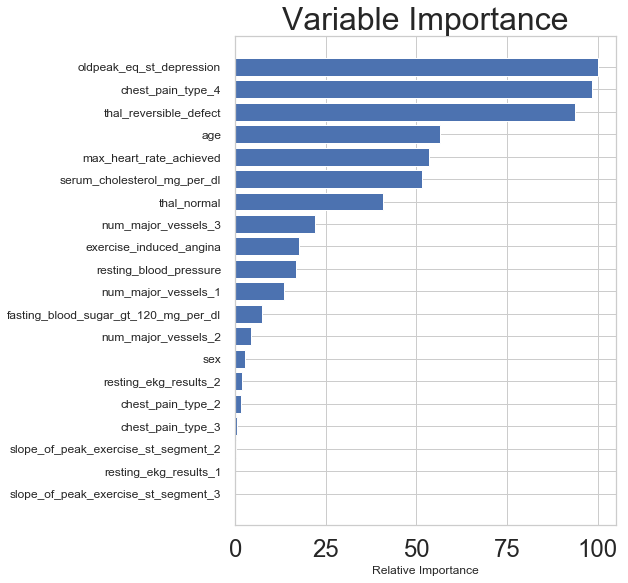

In [385]:
plt.figure(figsize=(15,9))

import matplotlib as mpl

mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['ytick.major.pad'] = 8

feature_importance = clf.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx], fontsize=12)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

plt.show()


**The top five features with =>50% relative importance are:<br/>**
    1. Old peak st depression <br/>
    2. Chest pain type 4 <br/>
    3. Thal reversible 'defect' <br/>
    4. Age <br/>
    5. Max heart rate achieved <br/>
    6. Serum cholesterol mg per dl <br/>

# Ada Boosting 

In [386]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=1)

ADA = model.fit(X_train, y_train)

predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

Ada_Boost_Training_Accuracy_Score=metrics.accuracy_score(y_train, y_preds_train)
Ada_Boost_Testing_Accuracy_Score=metrics.accuracy_score(y_test, y_preds_test)

print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 0.9206349206349206
Testing set accuracy is: 0.8148148148148148


In [387]:
print("\033[1m"+'Training Set\n'+'\033[0m',classification_report(y_test,y_preds_test))
print("\033[1m"+"Testing Set\n"+"\033[0m",classification_report(y_train,y_preds_train))

Training Set
               precision    recall  f1-score   support

           0       0.75      0.88      0.81        24
           1       0.88      0.77      0.82        30

   micro avg       0.81      0.81      0.81        54
   macro avg       0.82      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54

Testing Set
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        76
           1       0.90      0.90      0.90        50

   micro avg       0.92      0.92      0.92       126
   macro avg       0.92      0.92      0.92       126
weighted avg       0.92      0.92      0.92       126



In [388]:
Ada_Boost_Training_Accuracy_Score=metrics.accuracy_score(y_train, y_preds_train)
Ada_Boost_Testing_Accuracy_Score=metrics.accuracy_score(y_test, y_preds_test)

print('Training set accuracy is:',metrics.accuracy_score(y_train, y_preds_train))
print('Testing set accuracy is:',metrics.accuracy_score(y_test, y_preds_test))

Training set accuracy is: 0.9206349206349206
Testing set accuracy is: 0.8148148148148148


In [389]:
ADA_Score = model_selection.cross_val_score(ADA, X, Y, cv=3, scoring = 'accuracy')
print (ADA_Score)

[0.73770492 0.75       0.69491525]


In [390]:
ADA_Score = pd.DataFrame(ADA_Score)   
ADA_Score.rename(columns={ADA_Score.columns[0]: 'ADA' }, inplace = True)
print (ADA_Score)

   ADA     
0  0.737705
1  0.750000
2  0.694915


In [391]:
# most of the learners I used are quite strong, so maybe the stacking won't provide a lot of improvement. 

# Model Comparison 

In [392]:
SUMMARY_TABLE_2 = pd.DataFrame(np.array([['Random_Forest',Random_Forest_Training_Accuracy_Score,Random_Forest_Testing_Accuracy_Score], ['Bagging',BAG_Training_Accuracy_Score,BAG_Testing_Accuracy_Score], ['Gradient_Boosting',Gradient_Boosting_Training_Accuracy_Score,Gradient_Boosting_Testing_Accuracy_Score],['Ada Boosting',Ada_Boost_Training_Accuracy_Score,Ada_Boost_Testing_Accuracy_Score]]),
                    columns=['Model', 'Train1', 'Test'])
SUMMARY_TABLE_2

,Model,Train1,Test
0,Random_Forest,0.9206349206349206,0.8148148148148148
1,Bagging,0.9206349206349206,0.8148148148148148
2,Gradient_Boosting,0.9206349206349206,0.8148148148148148
3,Ada Boosting,0.9206349206349206,0.8148148148148148


In [393]:
SUMMARY_TABLE_3 = SUMMARY_TABLE_2.set_index(['Model'])

In [394]:
SUMMARY_TABLE_3["Train1"] = SUMMARY_TABLE_3.Train1.astype(float)
SUMMARY_TABLE_3["Test"] = SUMMARY_TABLE_3.Test.astype(float)
SUMMARY_TABLE_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Random_Forest to Ada Boosting
Data columns (total 2 columns):
Train1    4 non-null float64
Test      4 non-null float64
dtypes: float64(2)
memory usage: 96.0+ bytes


In [395]:
SUMMARY_TABLE_3["Train"]= abs(SUMMARY_TABLE_3["Train1"]-SUMMARY_TABLE_3["Test"])
SUMMARY_TABLE_3

,Train1,Test,Train
Model,,,
Random_Forest,0.920635,0.814815,0.10582
Bagging,0.920635,0.814815,0.10582
Gradient_Boosting,0.920635,0.814815,0.10582
Ada Boosting,0.920635,0.814815,0.10582


In [396]:
tables = [SUMMARY_TABLE1,SUMMARY_TABLE_3]
result = pd.concat(tables)
result1 = result.sort_values('Train',ascending=False)

In [397]:
result1.columns

Index(['Train1', 'Test', 'Train'], dtype='object')

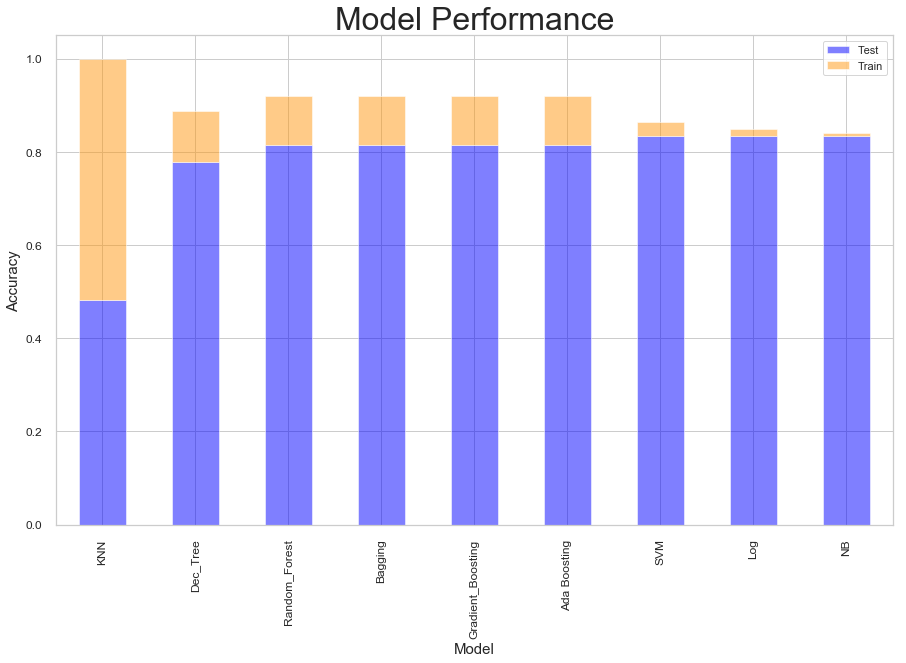

In [398]:
result1.loc[:,['Test','Train']].plot.bar(stacked=True, color=colors, alpha=0.5,figsize=(15,9))
plt.title('Model Performance')
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Model', fontsize=15)
plt.tick_params(labelsize=12)

plt.show()

# Stacking 

In [399]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [400]:
from mlxtend.classifier import StackingClassifier 
from sklearn import datasets
from sklearn.ensemble.forest import RandomForestClassifier

In [401]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

lr = LogisticRegression()

sclf = StackingClassifier(classifiers = [clf1, clf2, clf3], use_probas = True, meta_classifier = lr)

In [402]:
print ('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf],['KNN','Random Forest','Naive Bayes','StackingClassifier']):
    scores = model_selection.cross_val_score(clf, X, Y, cv=3, scoring = 'f1_macro')
    
    print ('F1 ScoresL: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), label))

3-fold cross validation:

F1 ScoresL: 0.54 (+/- 0.03) [KNN]
F1 ScoresL: 0.77 (+/- 0.03) [Random Forest]
F1 ScoresL: 0.79 (+/- 0.05) [Naive Bayes]
F1 ScoresL: 0.54 (+/- 0.03) [StackingClassifier]


In [403]:
print ('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf],['KNN','Random Forest','Naive Bayes','StackingClassifier']):
    scores = model_selection.cross_val_score(clf, X, Y, cv=3, scoring = 'accuracy')
    
    print ('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.56 (+/- 0.02) [KNN]
Accuracy: 0.78 (+/- 0.02) [Random Forest]
Accuracy: 0.79 (+/- 0.05) [Naive Bayes]
Accuracy: 0.56 (+/- 0.02) [StackingClassifier]


In [404]:
STACKING_Score = model_selection.cross_val_score(sclf, X, Y, cv=3, scoring = 'f1_macro')
print (STACKING_Score)

[0.51144165 0.58321756 0.53683575]


In [405]:
STACKING_Score = pd.DataFrame(STACKING_Score)  
STACKING_Score.rename(columns={ STACKING_Score.columns[0]: 'Stacking' }, inplace = True)
print (STACKING_Score)

   Stacking
0  0.511442
1  0.583218
2  0.536836


# Model Comparison

In [406]:
Model_Comparison = pd.concat([NB_Score,LM_Score,KNN1_Score,DT2_Score,RFC_Score,BAG_Score,SVM_Score,GBM_Score,ADA_Score,STACKING_Score], axis=1)
Model_Comparison

,Naive Bayes,Logistic Regression,KNN,Decision Tree,Random Forest,Bagging Model,SVM,Gradient_Boosting,ADA,Stacking
0,0.786885,0.836066,0.573770,0.803279,0.803279,0.786885,0.819672,0.721311,0.737705,0.511442
1,0.866667,0.816667,0.633333,0.566667,0.850000,0.766667,0.850000,0.733333,0.750000,0.583218
2,0.745763,0.711864,0.627119,0.661017,0.728814,0.694915,0.694915,0.644068,0.694915,0.536836


In [407]:
Model_Comparison_Summary = Model_Comparison.transpose()
Model_Comparison_Summary

,0,1,2
Naive Bayes,0.786885,0.866667,0.745763
Logistic Regression,0.836066,0.816667,0.711864
KNN,0.573770,0.633333,0.627119
Decision Tree,0.803279,0.566667,0.661017
Random Forest,0.803279,0.850000,0.728814
Bagging Model,0.786885,0.766667,0.694915
SVM,0.819672,0.850000,0.694915
Gradient_Boosting,0.721311,0.733333,0.644068
ADA,0.737705,0.750000,0.694915
Stacking,0.511442,0.583218,0.536836


In [408]:
Model_Comparison_Summary1= Model_Comparison_Summary.rename(columns={0:'fold_1',1:'fold_2',2:'fold_3'})
Model_Comparison_Summary1

,fold_1,fold_2,fold_3
Naive Bayes,0.786885,0.866667,0.745763
Logistic Regression,0.836066,0.816667,0.711864
KNN,0.573770,0.633333,0.627119
Decision Tree,0.803279,0.566667,0.661017
Random Forest,0.803279,0.850000,0.728814
Bagging Model,0.786885,0.766667,0.694915
SVM,0.819672,0.850000,0.694915
Gradient_Boosting,0.721311,0.733333,0.644068
ADA,0.737705,0.750000,0.694915
Stacking,0.511442,0.583218,0.536836


In [409]:
Model_Comparison_Summary1.columns

Index(['fold_1', 'fold_2', 'fold_3'], dtype='object')

In [410]:
del Model_Comparison_Summary1.index.name

In [411]:
Model_Comparison_Summary1.rename(columns={ Model_Comparison_Summary1.columns[0]: "fold_1" }, inplace = True)
Model_Comparison_Summary1

,fold_1,fold_2,fold_3
Naive Bayes,0.786885,0.866667,0.745763
Logistic Regression,0.836066,0.816667,0.711864
KNN,0.573770,0.633333,0.627119
Decision Tree,0.803279,0.566667,0.661017
Random Forest,0.803279,0.850000,0.728814
Bagging Model,0.786885,0.766667,0.694915
SVM,0.819672,0.850000,0.694915
Gradient_Boosting,0.721311,0.733333,0.644068
ADA,0.737705,0.750000,0.694915
Stacking,0.511442,0.583218,0.536836


In [412]:
Model_Comparison_Summary2=Model_Comparison_Summary1.sort_values('fold_2',ascending=False)

In [413]:
colors1 = ["#0000FF","#FF9912","#8A2BE2"]

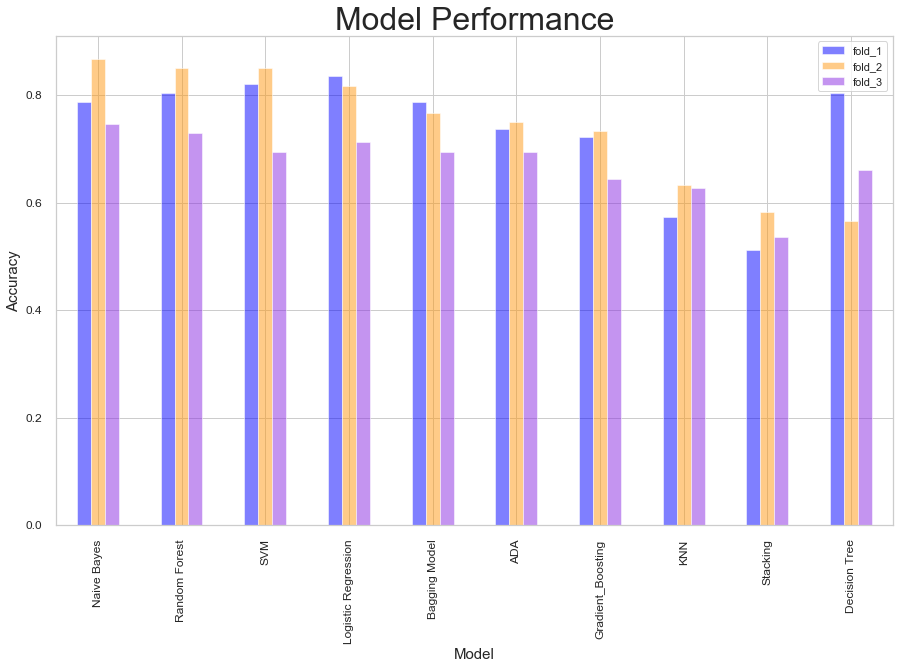

In [414]:
Model_Comparison_Summary2.loc[:,['fold_1','fold_2','fold_3']].plot.bar(stacked=False, color=colors1, alpha=0.5,figsize=(15,9))
plt.title('Model Performance')
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Model', fontsize=15)
plt.tick_params(labelsize=12)

plt.show()

In [ ]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Fiber_df[['active_cust']],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

#### PCA + MCA (Principal Component Analysis for Mixed Data)

In [225]:
pip install --user mca

Note: you may need to restart the kernel to use updated packages.


In [226]:
pip install --user prince

Note: you may need to restart the kernel to use updated packages.


In [227]:
import prince 
import pprint 

In [252]:
for_pca = train_4.copy()

pca_data1=for_pca.drop(columns=['patient_id','age_group','heart_disease_present'], axis=1)

pca_data1.head()
print (len (pca_data1.columns))
pca_data1.head()
pca_data1.columns

13


Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

In [229]:
famd = prince.FAMD(n_components=13,
                   n_iter=10,
                   copy=True,
                   check_input=True,
                   engine='auto',
                   random_state=42)
                   
famd = famd.fit(pca_data1)
                   
pp = pprint.PrettyPrinter()
pp.pprint(famd.explained_inertia_) 

[0.5320562220069855,
 0.40199474764850734,
 0.04360979891322973,
 0.004606624369000089,
 0.00277706337016512,
 0.0024817990256257986,
 0.0021366730352717486,
 0.002027149688597852,
 0.0018140908173330413,
 0.001436908559698704,
 0.0013777999554394505,
 0.001284640123241542,
 0.0010227042216770842]


# Select KBest 

In [230]:
from sklearn.feature_selection import SelectKBest, chi2

In [231]:
X_K_clf=X.iloc[:,:] #all features since Patient_id and Age group are removed 
y_K_clf=Y.iloc[:,:] #outcome 

In [262]:
X_K_clf

,resting_blood_pressure,fasting_blood_sugar_gt_120_mg_per_dl,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,thal_normal,thal_reversible_defect,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,resting_ekg_results_1,resting_ekg_results_2
0,128,0,308,0.0,1,45,170,0,0,0,1,0,1,0,0,0,0,0,0,1
1,110,0,214,1.6,0,54,158,0,1,0,1,0,0,1,0,0,0,0,0,0
2,125,0,304,0.0,1,77,162,1,0,0,1,0,0,0,1,0,0,1,0,1
3,152,0,223,0.0,1,40,181,0,0,0,0,1,0,0,1,0,0,0,0,0
4,178,0,270,4.2,1,59,145,0,0,1,0,1,0,0,0,0,0,0,0,1
5,130,0,180,0.0,1,42,150,0,0,0,1,0,0,1,0,0,0,0,0,0
6,150,0,258,2.6,0,60,157,0,1,0,0,1,0,0,1,0,1,0,0,1
7,150,0,276,0.6,1,57,112,1,1,0,0,0,0,0,1,1,0,0,0,1
8,170,0,326,3.4,1,59,140,1,0,1,0,1,0,0,1,0,0,0,0,1
9,120,0,219,1.6,0,50,158,0,1,0,1,0,0,1,0,0,0,0,0,0


In [266]:
X_K_clf_2=SelectKBest(score_func=chi2,k=5).fit_transform(X_K_clf,y_K_clf)

In [267]:
print (['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'])

['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age', 'max_heart_rate_achieved', 'exercise_induced_angina']


In [268]:
print(X_K_clf_2[:14])

[[  0.  170.    0.    0.    0. ]
 [  1.6 158.    0.    0.    0. ]
 [  0.  162.    1.    0.    1. ]
 [  0.  181.    0.    1.    1. ]
 [  4.2 145.    0.    1.    0. ]
 [  0.  150.    0.    0.    0. ]
 [  2.6 157.    0.    1.    1. ]
 [  0.6 112.    1.    0.    1. ]
 [  3.4 140.    1.    1.    1. ]
 [  1.6 158.    0.    0.    0. ]
 [  0.4 151.    0.    0.    1. ]
 [  0.  178.    0.    0.    1. ]
 [  0.  158.    0.    0.    0. ]
 [  0.2 152.    1.    0.    1. ]]


In [265]:
print (X_K_clf.head())

   resting_blood_pressure  fasting_blood_sugar_gt_120_mg_per_dl  \
0  128                     0                                      
1  110                     0                                      
2  125                     0                                      
3  152                     0                                      
4  178                     0                                      

   serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
0  308                          0.0                       1    45    
1  214                          1.6                       0    54    
2  304                          0.0                       1    77    
3  223                          0.0                       1    40    
4  270                          4.2                       1    59    

   max_heart_rate_achieved  exercise_induced_angina  \
0  170                      0                         
1  158                      0                         
2  162     

Ensemble modelling <br/>


https://www.kaggle.com/amrmahmoud123/1-guide-to-ensembling-methods

https://www.kaggle.com/jepsds/feature-selection-using-selectkbest?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com

# Ensemble Modelling: Part 2

Basic Ensemble Techniques <br/>

Max Voting <br/>
Averaging <br/>
Weighted Average <br/>

In [236]:
X= train_5.drop(columns=['patient_id','age_group','heart_disease_present'],axis=1)
Y= train_outcome.drop('patient_id',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, 
                                                    random_state=101)

In [237]:
#Mode

model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)

final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

final_pred

array([0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1.])

In [238]:
#Max_Voting_Training_Accuracy_Score=metrics.accuracy_score(y_train, y_preds_train)
#Max_Voting_Testing_Accuracy_Score=metrics.accuracy_score(y_test, y_preds_test)

Max_Voting_Testing_Accuracy_Score=metrics.accuracy_score(y_test,final_pred)

print (Max_Voting_Testing_Accuracy_Score)

0.7592592592592593


In [239]:
#Voting Classifier : hard voting 

from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model3= KNeighborsClassifier()

model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('kn',model3)], voting='hard')
model.fit(X_train,y_train)
Voting_Classifier_Accuracy_Score = metrics.accuracy_score(y_test,final_pred)

print ()
print (Voting_Classifier_Accuracy_Score)
#model.score(x_test,y_test)


0.7592592592592593


In [240]:
#Voting Classifier : soft voting 

model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model3= KNeighborsClassifier()

model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('kn',model3)], voting='soft')
model.fit(X_train,y_train)
Voting_Classifier_Accuracy_Score1 = metrics.accuracy_score(y_test,final_pred)

print (Voting_Classifier_Accuracy_Score1)

0.7592592592592593


In [241]:
#Averaging 

model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)

final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred2 = (pred1 + pred2 +pred3)/3

print (final_pred2)
print (pred1)
print('*************************************************************************')
print(pred2)
print('*************************************************************************')
print(pred3)

[0.         0.66666667 0.         0.33333333 0.33333333 1.
 1.         0.33333333 0.33333333 0.33333333 0.66666667 0.66666667
 0.66666667 0.         0.33333333 0.66666667 1.         0.33333333
 0.         0.         0.33333333 1.         0.         0.33333333
 0.         1.         0.66666667 0.66666667 0.66666667 0.33333333
 0.         1.         0.66666667 0.33333333 1.         1.
 0.         0.66666667 0.33333333 0.33333333 0.33333333 0.66666667
 0.66666667 0.66666667 0.66666667 0.         0.         0.33333333
 0.         0.         0.         1.         0.33333333 0.66666667]
[0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1]
*************************************************************************
[0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0]
*************************************************************************
[0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0

In [242]:
final_pred_binary = np.where(final_pred2>0.5, 1, 0)
#y_test_preds_combined = np.where(test_proba>0.5, 1, 0)

In [243]:
AVG_Voting_Classifier = metrics.accuracy_score(y_test,final_pred_binary)
print(AVG_Voting_Classifier)

0.7037037037037037


In [244]:
#Weighted Voting 

model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict_proba(X_test)
pred2=model2.predict_proba(X_test)
pred3=model3.predict_proba(X_test)

final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred3 = (pred1*0.2 + pred2*0.3 +pred3*0.5)

In [245]:
final_pred_binary2 = np.where(final_pred3>0.5, 1, 0)

In [246]:
WAVG_Voting_Classifier = metrics.accuracy_score(y_test,final_pred_binary2[:,1])
print(WAVG_Voting_Classifier)

0.7777777777777778
